# Workshop Task - Training models and preprocessing


We have classification problem where we have to predict whether a credit would be approved or not for a client.


|Field Name|	Order|	Type (Format)|Description|
| -------| -------|-----------|---------|
|checking_status|	1|	string (default)|Status of existing checking account, in Deutsche Mark.|	
|duration	|2|	number (default)	|Duration in months|
|credit_history	|3|	string (default)	|Credit history (credits taken, paid back duly, delays, critical accounts)|
|purpose	|4|	string (default)	|Purpose of the credit (car, television,…)|
|credit_amount	|5|	number (default)	|Credit amount|
|savings_status	|6|	string (default)	|Status of savings account/bonds, in Deutsche Mark.|
|employment	|7|	string (default)	|Present employment, in number of years.|
|installment_commitment	|8|	number (default)|Installment rate in percentage of disposable income|	
|personal_status	|9|	string (default)|Personal status (married, single,…) and sex|
|other_parties	|10|	string (default)|Other debtors / guarantors|	
|residence_since	|11|	number (default)|Present residence since X years|	
|property_magnitude	|12|	string (default)|Property (e.g. real estate)|	
|age	|13|	number (default)	|Age in years|
|other_payment_plans	|14|	string (default)|Other installment plans (banks, stores)|
|housing	|15|	string (default)	|Housing (rent, own,…)|
|existing_credits	|16|	number (default)|Number of existing credits at this bank|	
|job	|17|	string (default)	|Job|
|num_dependents	|18|	number (default)|Number of people being liable to provide maintenance for|	
|own_telephone	|19|	string (default)|Telephone (yes,no)|	
|foreign_worker	|20|	string (default)|Foreign worker (yes,no)|	
accepted	|21|	string (default)	|Class|



In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns
import itertools
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder

import category_encoders as ce

from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier as xgb

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

from imblearn.over_sampling import SMOTE

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read dataset
dataset = pd.read_csv(r'dataset-workshop.csv')

In [3]:
dataset.head(10)

,Unnamed: 0,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,accepted
0,0,0_checking,6,Critical_acct_other_credits_existing,radio/television,3380.000000,Unknown_or_no_savings_acct,>7yrs,4,male_single,...,real_estate,NaN,none,own,2,skilled_employee/official,1,yes,yes,0
1,1,from_0_to_200,48,Existing_credits_paid_till_now,radio/television,6940.208336,<100DM,1_to_4yrs,2,female_divorced/separated/married,...,real_estate,22.0,none,own,1,skilled_employee/official,1,none,yes,1
2,2,None,12,Critical_acct_other_credits_existing,education,1902.370483,<100DM,4_to_7yrs,2,male_single,...,real_estate,49.0,none,own,1,unskilled_resident,2,none,yes,0
3,3,0_checking,42,Existing_credits_paid_till_now,furniture/equipment,1097.000000,<100DM,4_to_7yrs,2,male_single,...,building_society_savings_agreement/life_insurance,45.0,none,for_free,1,skilled_employee/official,2,none,yes,0
4,4,0_checking,24,Delay_in_past,new_car,9021.266894,<100DM,1_to_4yrs,3,male_single,...,unknown/no_property,53.0,none,for_free,2,skilled_employee/official,2,none,yes,1
5,5,None,36,Existing_credits_paid_till_now,education,1227.203916,Unknown_or_no_savings_acct,1_to_4yrs,2,male_single,...,unknown/no_property,35.0,none,for_free,1,unskilled_resident,2,yes,yes,0
6,6,None,24,Existing_credits_paid_till_now,furniture/equipment,1985.000000,500_to_1000DM,>7yrs,3,male_single,...,building_society_savings_agreement/life_insurance,53.0,none,own,1,skilled_employee/official,1,none,yes,0
7,7,from_0_to_200,36,None,used_car,2809.000000,<100DM,1_to_4yrs,2,male_single,...,car_or_other_nonsavings,35.0,none,rent,1,management_self-employed_highly_qualified/officer,1,yes,yes,0
8,8,None,12,Existing_credits_paid_till_now,radio/television,2484.663607,>1000DM,4_to_7yrs,2,male_divorced/separated,...,real_estate,61.0,none,own,1,unskilled_resident,1,none,yes,0
9,9,from_0_to_200,30,Critical_acct_other_credits_existing,new_car,16324.000000,<100DM,unemployed,4,male_married/widowed,...,car_or_other_nonsavings,28.0,none,own,2,management_self-employed_highly_qualified/officer,1,none,yes,1


In [4]:
# Set index
dataset.set_index("Unnamed: 0", inplace=True)

In [5]:
# Dataset basic info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003 entries, 0 to 1002
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1003 non-null   object 
 1   duration                1003 non-null   object 
 2   credit_history          1003 non-null   object 
 3   purpose                 1003 non-null   object 
 4   credit_amount           1003 non-null   float64
 5   savings_status          1003 non-null   object 
 6   employment              1003 non-null   object 
 7   installment_commitment  1003 non-null   int64  
 8   personal_status         1003 non-null   object 
 9   other_parties           1003 non-null   object 
 10  residence_since         1003 non-null   int64  
 11  property_magnitude      1003 non-null   object 
 12  age                     953 non-null    float64
 13  other_payment_plans     1003 non-null   object 
 14  housing                 1003 non-null   

# EDA

## Univariate variable analysis 

In [6]:
#Unique values in each column
dataset.nunique()

checking_status             7
duration                   34
credit_history              6
purpose                    12
credit_amount             986
savings_status              5
employment                  5
installment_commitment      4
personal_status             5
other_parties               3
residence_since             4
property_magnitude          4
age                        53
other_payment_plans         3
housing                     3
existing_credits            4
job                         4
num_dependents              2
own_telephone               2
foreign_worker              2
accepted                    2
dtype: int64

In [7]:
# Numeric vs Categoric features
from pandas.api.types import is_string_dtype, is_numeric_dtype

numer_col = []
categ_col = []
print("Numeric columns")
for column in dataset.columns:
    if is_numeric_dtype(dataset[column]):
        num_col = column
        numer_col.append(num_col)
        print(dataset.columns.get_loc(column), num_col)
print("----------------------------------")        
print("Categorical columns")        
for column in dataset.columns:
    if is_string_dtype(dataset[column]):
        cat_col = column
        categ_col.append(cat_col)
        print(dataset.columns.get_loc(column), cat_col)
        
numer_col_df = dataset[numer_col]
categ_col_df = dataset[categ_col]

Numeric columns
4 credit_amount
7 installment_commitment
10 residence_since
12 age
15 existing_credits
17 num_dependents
20 accepted
----------------------------------
Categorical columns
0 checking_status
1 duration
2 credit_history
3 purpose
5 savings_status
6 employment
8 personal_status
9 other_parties
11 property_magnitude
13 other_payment_plans
14 housing
16 job
18 own_telephone
19 foreign_worker


### Detect what is wrong with the following features : 

      - change_purpose
      - duration
      - checking_status
      - personal_status  

Hint : use dataframe['feature'].unique()


### Fix the problems on the features above 
    
    - hint : Use df.replace from pandas, and df.apply


In [8]:
#Dataset detailed info
for c in dataset.columns:
    print(f'\n{pd.value_counts(dataset[c])}')


None                394
0_checking          197
from_zero_to_200    144
from_0_to_200       127
zero_checking        78
more_than_200        51
more_then_200        12
Name: checking_status, dtype: int64

24      174
12      166
18`     105
36       79
6        72
15       63
None     53
9        48
48       47
30       39
21       31
10       27
60       13
27       12
42       11
11        9
20        7
8         7
4         6
14        4
45        4
13        4
28        3
7         3
33        3
22        2
54        2
39        2
16        2
5         1
26        1
47        1
72        1
40        1
Name: duration, dtype: int64

Existing_credits_paid_till_now          503
Critical_acct_other_credits_existing    281
Delay_in_past                            82
None                                     50
All_credits_paid_duly                    48
No_credits_taken_or_all_paid             39
Name: credit_history, dtype: int64

radio/television       282
new_car                208
fu

In [9]:
# Replacing same categories labeled differently in "checking_status"
dataset['checking_status'].replace(to_replace=['zero_checking', 'from_zero_to_200', 'more_then_200'], value=['0_checking', 'from_0_to_200', 'more_than_200'], inplace=True)

In [10]:
# Check unique values in "checking_status"
dataset['checking_status'].unique()

array(['0_checking', 'from_0_to_200', 'None', 'more_than_200'],
      dtype=object)

In [11]:
# Replacing same categories labeled differently in "purpose"
dataset['purpose'].replace(to_replace=['newcar', 'usedcar'], value=['new_car', 'used_car'], inplace=True)

In [12]:
# Check unique values in "purpose"
dataset['purpose'].unique()

array(['radio/television', 'education', 'furniture/equipment', 'new_car',
       'used_car', 'business', 'domestic_appliances', 'repairs', 'other',
       'retraining'], dtype=object)

In [13]:
# Replacing same categories labeled differently in "personal_status"
dataset['personal_status'].replace(to_replace=['feemale_divorced/separated/married'], value=['female_divorced/separated/married'], inplace=True)

In [14]:
# Check unique values in "personal_status"
dataset['personal_status'].unique()

array(['male_single', 'female_divorced/separated/married',
       'male_divorced/separated', 'male_married/widowed'], dtype=object)

In [15]:
# Replacing same categories labeled differently in "duration"
dataset['duration'].replace(to_replace="18`", value=18, inplace=True)

In [16]:
# Change data type to numeric
dataset['duration'] = pd.to_numeric(dataset['duration'], errors='coerce')

In [17]:
# Check unique values in "duration"
dataset['duration'].unique()

array([ 6., 48., 12., 42., 24., 36., 30., nan, 15.,  9., 10.,  7., 60.,
       18., 45., 11., 27.,  8., 54., 20., 14., 33., 21., 16.,  4., 47.,
       13., 22., 28.,  5., 39., 26., 72., 40.])

### Detect missing values and handle them
      * Warning : there are 2 missing type of values
      * hint : dataset = dataset.replace('missing_value', np.nan)

In [18]:
#Locating "None" values
data_None = []
for i in range(0,(len(dataset.columns))):
    data_No = dataset[dataset[dataset.columns[i]] == 'None'].count() ['accepted']
    data_None.append(data_No)

df_none = pd.DataFrame(data=[dataset.columns, data_None], index=["column", "None"]).transpose()
df_none

,column,None
0,checking_status,394
1,duration,0
2,credit_history,50
3,purpose,0
4,credit_amount,0
5,savings_status,0
6,employment,0
7,installment_commitment,0
8,personal_status,0
9,other_parties,910


In [19]:
#Locating "none" values
data_none = []
for i in range(0,(len(dataset.columns))):
    data_no = dataset[dataset[dataset.columns[i]] == 'none'].count() ['accepted']
    data_none.append(data_no)

df_none = pd.DataFrame(data=[dataset.columns, data_none], index=["column", "none"]).transpose()
df_none

,column,none
0,checking_status,0
1,duration,0
2,credit_history,0
3,purpose,0
4,credit_amount,0
5,savings_status,0
6,employment,0
7,installment_commitment,0
8,personal_status,0
9,other_parties,0


In [20]:
#Replacing none to None in "other_payment_plans"
dataset['other_payment_plans'].replace(to_replace=['none'], value='None', inplace=True)

In [21]:
#Replace all "None"-s to np.nan - for all columns
dataset.replace(to_replace='None', value=np.nan, inplace=True)

In [22]:
# All null values
dataset.isnull().sum()

checking_status           394
duration                   53
credit_history             50
purpose                     0
credit_amount               0
savings_status              0
employment                  0
installment_commitment      0
personal_status             0
other_parties             910
residence_since             0
property_magnitude          0
age                        50
other_payment_plans       817
housing                     0
existing_credits            0
job                         0
num_dependents              0
own_telephone               0
foreign_worker              0
accepted                    0
dtype: int64

In [23]:
#Replacing missing values
from sklearn.impute import SimpleImputer

def input_values(strategy, dataset, columns):
    dataset_new = dataset.copy()
    simple_imputer = SimpleImputer(strategy=strategy)
    dataset_new[columns] = simple_imputer.fit_transform(dataset_new[columns])
    return dataset_new

In [24]:
#Replacing missing values
dataset_wo_missing_values = input_values(strategy='most_frequent', 
                                              dataset=dataset, 
                                              columns=dataset.columns) 

In [25]:
dataset_wo_missing_values

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,accepted
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,0_checking,6.0,Critical_acct_other_credits_existing,radio/television,3380.000000,Unknown_or_no_savings_acct,>7yrs,4,male_single,guarantor,...,real_estate,27.0,bank,own,2,skilled_employee/official,1,yes,yes,0
1,from_0_to_200,48.0,Existing_credits_paid_till_now,radio/television,6940.208336,<100DM,1_to_4yrs,2,female_divorced/separated/married,guarantor,...,real_estate,22.0,bank,own,1,skilled_employee/official,1,none,yes,1
2,0_checking,12.0,Critical_acct_other_credits_existing,education,1902.370483,<100DM,4_to_7yrs,2,male_single,guarantor,...,real_estate,49.0,bank,own,1,unskilled_resident,2,none,yes,0
3,0_checking,42.0,Existing_credits_paid_till_now,furniture/equipment,1097.000000,<100DM,4_to_7yrs,2,male_single,guarantor,...,building_society_savings_agreement/life_insurance,45.0,bank,for_free,1,skilled_employee/official,2,none,yes,0
4,0_checking,24.0,Delay_in_past,new_car,9021.266894,<100DM,1_to_4yrs,3,male_single,guarantor,...,unknown/no_property,53.0,bank,for_free,2,skilled_employee/official,2,none,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,0_checking,12.0,Existing_credits_paid_till_now,furniture/equipment,3143.481540,<100DM,4_to_7yrs,3,female_divorced/separated/married,guarantor,...,real_estate,31.0,bank,own,1,unskilled_resident,1,none,yes,0
999,0_checking,30.0,Existing_credits_paid_till_now,used_car,4200.276629,<100DM,1_to_4yrs,4,male_divorced/separated,guarantor,...,building_society_savings_agreement/life_insurance,40.0,bank,own,1,management_self-employed_highly_qualified/officer,1,yes,yes,0
1000,0_checking,12.0,Existing_credits_paid_till_now,radio/television,1094.000000,<100DM,>7yrs,4,male_single,guarantor,...,car_or_other_nonsavings,38.0,bank,own,1,skilled_employee/official,1,none,yes,0


In [26]:
# Check null values
dataset_wo_missing_values.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
accepted                  0
dtype: int64

## Data distributioin

### Detect skewed distribution on a numeric variable :
      - Use log/sqrt transformation on at least one variable with skewed distribution
      - hint : use np.log() or np.sqrt()

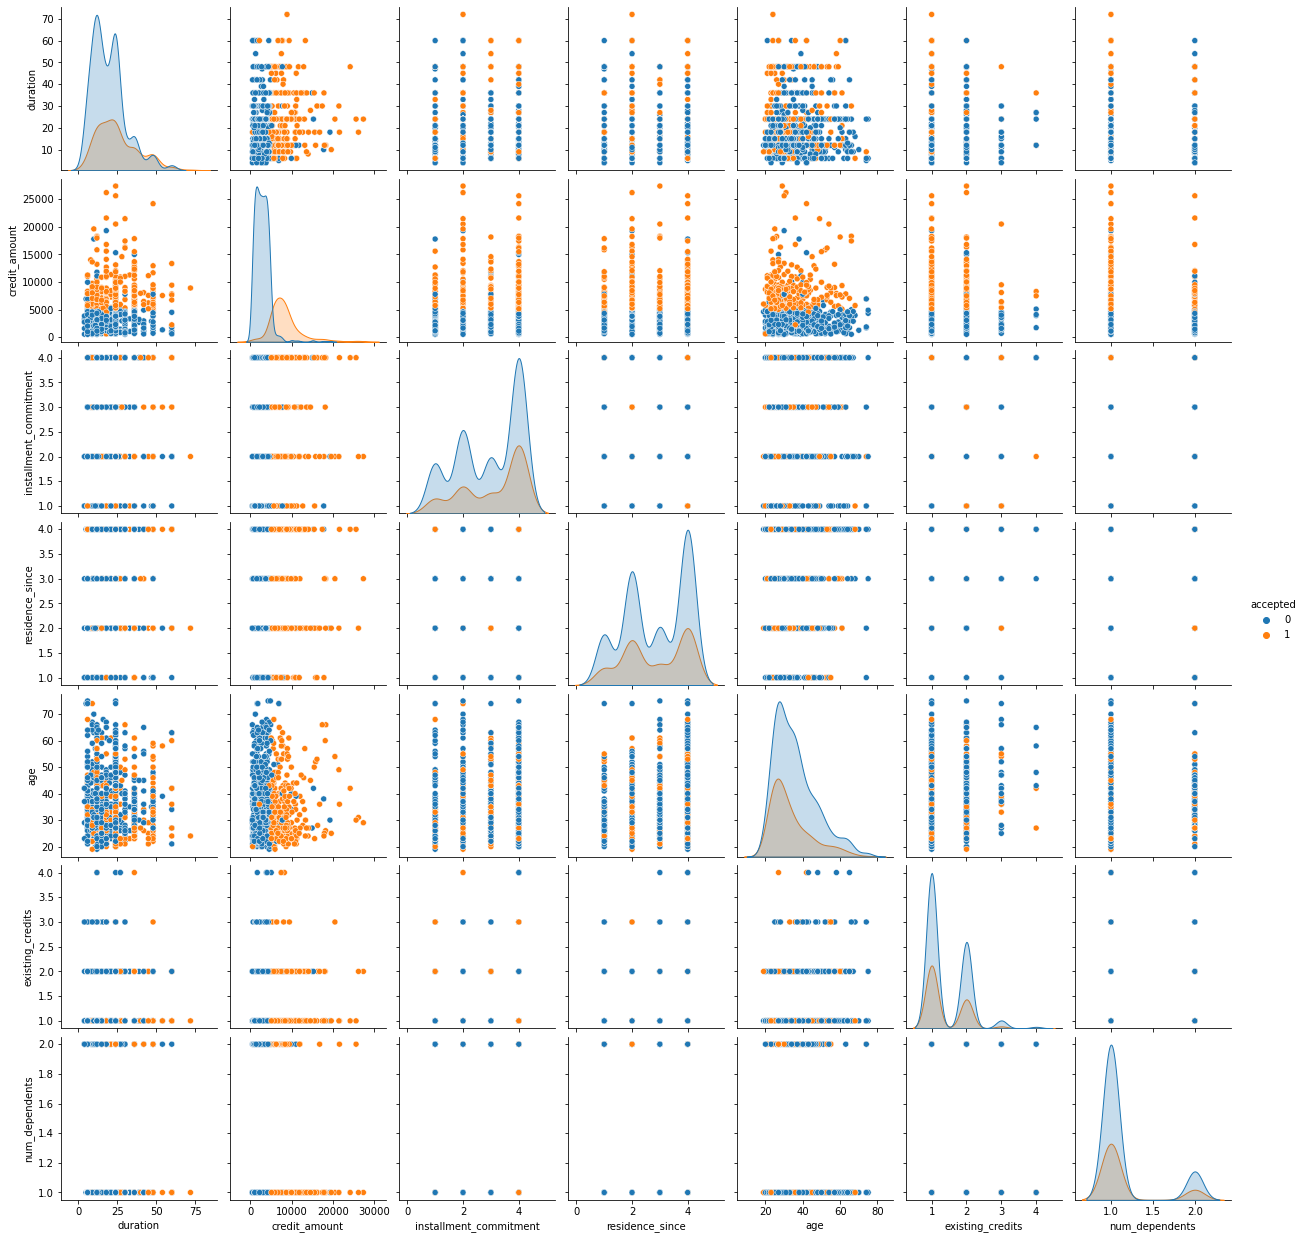

In [27]:
#Features vizualization
sns.pairplot(data=dataset_wo_missing_values, hue='accepted')#, dropna=True)
plt.show()

### Comment: 
- "duration", "credit_amount" and "age" show right skewed distribution.

#### Removing skew

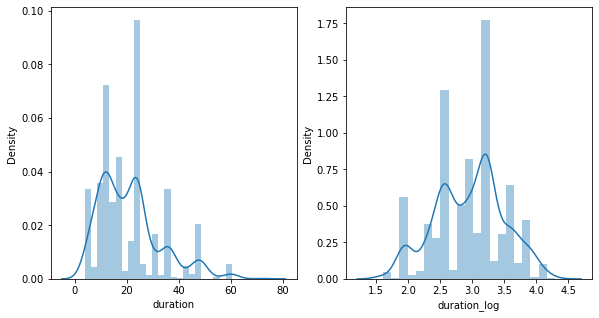

In [28]:
dataset_wo_missing_values['duration_log'] = np.log(dataset_wo_missing_values['duration']+1)

plt.figure(figsize=(15,5))
plt.subplot(131)
feature_plot = sns.distplot(dataset_wo_missing_values['duration'],label=dataset_wo_missing_values['duration'])
plt.subplot(132)
feature_plot = sns.distplot(dataset_wo_missing_values['duration_log'],label=dataset_wo_missing_values['duration_log'])

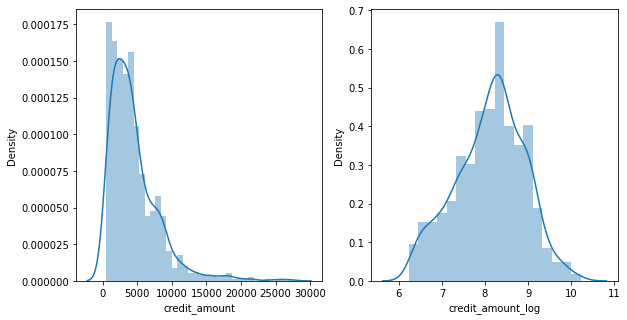

In [29]:
dataset_wo_missing_values['credit_amount_log'] = np.log(dataset_wo_missing_values['credit_amount']+1)

plt.figure(figsize=(15,5))
plt.subplot(131)
feature_plot = sns.distplot(dataset_wo_missing_values['credit_amount'],label=dataset_wo_missing_values['credit_amount'])
plt.subplot(132)
feature_plot = sns.distplot(dataset_wo_missing_values['credit_amount_log'],label=dataset_wo_missing_values['credit_amount_log'])

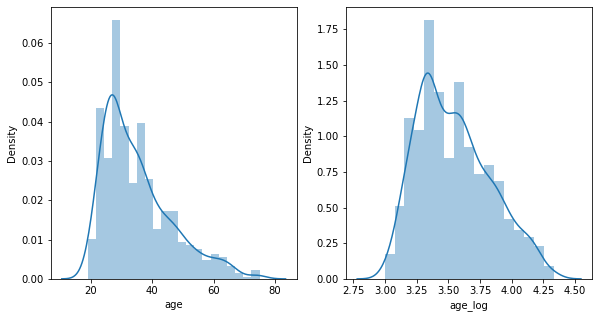

In [30]:
dataset_wo_missing_values['age_log'] = np.log(dataset_wo_missing_values['age']+1)

plt.figure(figsize=(15,5))
plt.subplot(131)
feature_plot = sns.distplot(dataset_wo_missing_values['age'],label=dataset_wo_missing_values['age'])
plt.subplot(132)
feature_plot = sns.distplot(dataset_wo_missing_values['age_log'],label=dataset_wo_missing_values['age_log'])

### Target variable distribution

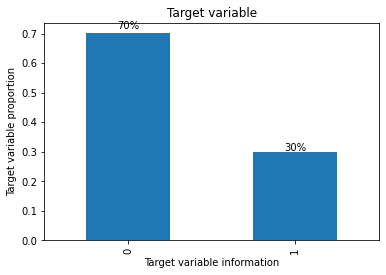

In [31]:
# Target variable distribution
plt.title("Target variable Bar plot Description")
plt.xlabel("Target variable information")
plt.ylabel("Target variable proportion")

ax = dataset_wo_missing_values['accepted'].value_counts(normalize=True).plot.bar(title='Target variable')#, format_string='{:.1f}% ').
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

### Comment: 
Relativelly balanced dataset. Target variable class division 70/30.

### Manual Label Encoding

In [32]:
# Encoding "foreign_worker"
dataset_wo_missing_values['foreign_worker'].replace(to_replace=['no', 'yes'], value=[0, 1], inplace=True)

In [33]:
# Encoding "own_telephone"
dataset_wo_missing_values['own_telephone'].replace(to_replace=['none', 'yes'], value=[0, 1], inplace=True)

In [34]:
# Encoding "checking_status"
new_column = dataset_wo_missing_values['checking_status'].astype('category') 
new_column = new_column.cat.codes
mle_dataset = dataset_wo_missing_values.assign(checking_status_labelled=new_column)

mapper = {'0_checking': 0, 'from_0_to_200': 1, 'more_than_200': 2}
mle_dataset = mle_dataset.assign(checking_status_labelled=mle_dataset['checking_status'].replace(mapper))
# label_encoded_dataset

In [35]:
# Encoding "savings_status"
new_column = dataset_wo_missing_values['savings_status'].astype('category') 
new_column = new_column.cat.codes
mle_dataset = mle_dataset.assign(savings_status_labelled=new_column)

mapper = {'Unknown_or_no_savings_acct': 0, '<100DM': 100, '100_to_500DM': 250, '500_to_1000DM': 750, '>1000DM': 1000}
mle_dataset = mle_dataset.assign(savings_status_labelled=mle_dataset['savings_status'].replace(mapper))
# label_encoded_dataset

In [36]:
# Encoding "employment"
new_column = dataset_wo_missing_values['employment'].astype('category') 
new_column = new_column.cat.codes
mle_dataset = mle_dataset.assign(employment_labelled=new_column)

mapper = {'unemployed': 0, '<1yr': 1, '1_to_4yrs': 2.5, '4_to_7yrs': 5.5, '>7yrs': 7}
mle_dataset = mle_dataset.assign(employment_labelled=mle_dataset['employment'].replace(mapper))
# label_encoded_dataset

In [37]:
# Encoding "property_magnitude"
new_column = dataset_wo_missing_values['property_magnitude'].astype('category') 
new_column = new_column.cat.codes
mle_dataset = mle_dataset.assign(property_magnitude_labelled=new_column)

mapper = {'unknown/no_property': 0, 'car_or_other_nonsavings': 1, 'building_society_savings_agreement/life_insurance': 2, 'real_estate': 3}
mle_dataset = mle_dataset.assign(property_magnitude_labelled=mle_dataset['property_magnitude'].replace(mapper))
# label_encoded_dataset

In [38]:
# Encoding "job"
new_column = dataset_wo_missing_values['job'].astype('category') 
new_column = new_column.cat.codes
mle_dataset = mle_dataset.assign(job_labelled=new_column)

mapper = {'unemployed/unskilled_nonresident': 0, 'unskilled_resident': 1, 'skilled_employee/official': 2, 'management_self-employed_highly_qualified/officer': 3}
mle_dataset = mle_dataset.assign(job_labelled=mle_dataset['job'].replace(mapper))
# label_encoded_dataset

In [39]:
mle_dataset

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,foreign_worker,accepted,duration_log,credit_amount_log,age_log,checking_status_labelled,savings_status_labelled,employment_labelled,property_magnitude_labelled,job_labelled
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,0_checking,6.0,Critical_acct_other_credits_existing,radio/television,3380.000000,Unknown_or_no_savings_acct,>7yrs,4,male_single,guarantor,...,1,0,1.945910,8.125927,3.332205,0,0,7.0,3,2
1,from_0_to_200,48.0,Existing_credits_paid_till_now,radio/television,6940.208336,<100DM,1_to_4yrs,2,female_divorced/separated/married,guarantor,...,1,1,3.891820,8.845231,3.135494,1,100,2.5,3,2
2,0_checking,12.0,Critical_acct_other_credits_existing,education,1902.370483,<100DM,4_to_7yrs,2,male_single,guarantor,...,1,0,2.564949,7.551382,3.912023,0,100,5.5,3,1
3,0_checking,42.0,Existing_credits_paid_till_now,furniture/equipment,1097.000000,<100DM,4_to_7yrs,2,male_single,guarantor,...,1,0,3.761200,7.001246,3.828641,0,100,5.5,2,2
4,0_checking,24.0,Delay_in_past,new_car,9021.266894,<100DM,1_to_4yrs,3,male_single,guarantor,...,1,1,3.218876,9.107451,3.988984,0,100,2.5,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,0_checking,12.0,Existing_credits_paid_till_now,furniture/equipment,3143.481540,<100DM,4_to_7yrs,3,female_divorced/separated/married,guarantor,...,1,0,2.564949,8.053404,3.465736,0,100,5.5,3,1
999,0_checking,30.0,Existing_credits_paid_till_now,used_car,4200.276629,<100DM,1_to_4yrs,4,male_divorced/separated,guarantor,...,1,0,3.433987,8.343144,3.713572,0,100,2.5,2,3
1000,0_checking,12.0,Existing_credits_paid_till_now,radio/television,1094.000000,<100DM,>7yrs,4,male_single,guarantor,...,1,0,2.564949,6.998510,3.663562,0,100,7.0,1,2


In [40]:
# Working dataset 
w_dataset = mle_dataset.drop(['checking_status', 
                                               'savings_status', 
                                               'employment', 
                                               'property_magnitude', 
                                               'job', 
                                               'duration', 
                                               'credit_amount', 
                                               'age'], axis=1)

In [41]:
w_dataset

,credit_history,purpose,installment_commitment,personal_status,other_parties,residence_since,other_payment_plans,housing,existing_credits,num_dependents,...,foreign_worker,accepted,duration_log,credit_amount_log,age_log,checking_status_labelled,savings_status_labelled,employment_labelled,property_magnitude_labelled,job_labelled
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,Critical_acct_other_credits_existing,radio/television,4,male_single,guarantor,4,bank,own,2,1,...,1,0,1.945910,8.125927,3.332205,0,0,7.0,3,2
1,Existing_credits_paid_till_now,radio/television,2,female_divorced/separated/married,guarantor,2,bank,own,1,1,...,1,1,3.891820,8.845231,3.135494,1,100,2.5,3,2
2,Critical_acct_other_credits_existing,education,2,male_single,guarantor,3,bank,own,1,2,...,1,0,2.564949,7.551382,3.912023,0,100,5.5,3,1
3,Existing_credits_paid_till_now,furniture/equipment,2,male_single,guarantor,4,bank,for_free,1,2,...,1,0,3.761200,7.001246,3.828641,0,100,5.5,2,2
4,Delay_in_past,new_car,3,male_single,guarantor,4,bank,for_free,2,2,...,1,1,3.218876,9.107451,3.988984,0,100,2.5,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,Existing_credits_paid_till_now,furniture/equipment,3,female_divorced/separated/married,guarantor,4,bank,own,1,1,...,1,0,2.564949,8.053404,3.465736,0,100,5.5,3,1
999,Existing_credits_paid_till_now,used_car,4,male_divorced/separated,guarantor,4,bank,own,1,1,...,1,0,3.433987,8.343144,3.713572,0,100,2.5,2,3
1000,Existing_credits_paid_till_now,radio/television,4,male_single,guarantor,4,bank,own,1,1,...,1,0,2.564949,6.998510,3.663562,0,100,7.0,1,2


### Scale the numeric data (some of them)

In [42]:
def scale(dataset, columns):
    dataset_new = dataset.copy()
    standard_scaller = StandardScaler() 
    dataset_new[columns] = standard_scaller.fit_transform(dataset_new[columns])


    return dataset_new

In [43]:
# Scaling dataset
scale_cols = ['savings_status_labelled']
scaled_dataset = scale(w_dataset, columns=scale_cols)
target = scaled_dataset['accepted']

In [44]:
scaled_dataset

,credit_history,purpose,installment_commitment,personal_status,other_parties,residence_since,other_payment_plans,housing,existing_credits,num_dependents,...,foreign_worker,accepted,duration_log,credit_amount_log,age_log,checking_status_labelled,savings_status_labelled,employment_labelled,property_magnitude_labelled,job_labelled
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,Critical_acct_other_credits_existing,radio/television,4,male_single,guarantor,4,bank,own,2,1,...,1,0,1.945910,8.125927,3.332205,0,-0.721566,7.0,3,2
1,Existing_credits_paid_till_now,radio/television,2,female_divorced/separated/married,guarantor,2,bank,own,1,1,...,1,1,3.891820,8.845231,3.135494,1,-0.322816,2.5,3,2
2,Critical_acct_other_credits_existing,education,2,male_single,guarantor,3,bank,own,1,2,...,1,0,2.564949,7.551382,3.912023,0,-0.322816,5.5,3,1
3,Existing_credits_paid_till_now,furniture/equipment,2,male_single,guarantor,4,bank,for_free,1,2,...,1,0,3.761200,7.001246,3.828641,0,-0.322816,5.5,2,2
4,Delay_in_past,new_car,3,male_single,guarantor,4,bank,for_free,2,2,...,1,1,3.218876,9.107451,3.988984,0,-0.322816,2.5,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,Existing_credits_paid_till_now,furniture/equipment,3,female_divorced/separated/married,guarantor,4,bank,own,1,1,...,1,0,2.564949,8.053404,3.465736,0,-0.322816,5.5,3,1
999,Existing_credits_paid_till_now,used_car,4,male_divorced/separated,guarantor,4,bank,own,1,1,...,1,0,3.433987,8.343144,3.713572,0,-0.322816,2.5,2,3
1000,Existing_credits_paid_till_now,radio/television,4,male_single,guarantor,4,bank,own,1,1,...,1,0,2.564949,6.998510,3.663562,0,-0.322816,7.0,1,2


## Encoding

In [45]:
# Features to be encoded
cod_features = ['credit_history', 
                       'purpose', 
                       'personal_status', 
                       'other_parties', 
                       'other_payment_plans', 
                       'housing']

### Label Encoding

In [46]:
from sklearn.preprocessing import LabelEncoder

def label_encoding_notordinal(dataset, columns):
    dataset_ = dataset.copy()
    transformer = LabelEncoder()
    for column in columns:
        dataset_[column]  = transformer.fit_transform(dataset_[column])
    return dataset_

In [47]:
# Label Encoding 
le_dataset = label_encoding_notordinal(scaled_dataset, 
                                                   columns=cod_features)

In [48]:
le_dataset

,credit_history,purpose,installment_commitment,personal_status,other_parties,residence_since,other_payment_plans,housing,existing_credits,num_dependents,...,foreign_worker,accepted,duration_log,credit_amount_log,age_log,checking_status_labelled,savings_status_labelled,employment_labelled,property_magnitude_labelled,job_labelled
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,1,6,4,3,1,4,0,1,2,1,...,1,0,1.945910,8.125927,3.332205,0,-0.721566,7.0,3,2
1,3,6,2,0,1,2,0,1,1,1,...,1,1,3.891820,8.845231,3.135494,1,-0.322816,2.5,3,2
2,1,2,2,3,1,3,0,1,1,2,...,1,0,2.564949,7.551382,3.912023,0,-0.322816,5.5,3,1
3,3,3,2,3,1,4,0,0,1,2,...,1,0,3.761200,7.001246,3.828641,0,-0.322816,5.5,2,2
4,2,4,3,3,1,4,0,0,2,2,...,1,1,3.218876,9.107451,3.988984,0,-0.322816,2.5,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,3,3,3,0,1,4,0,1,1,1,...,1,0,2.564949,8.053404,3.465736,0,-0.322816,5.5,3,1
999,3,9,4,1,1,4,0,1,1,1,...,1,0,3.433987,8.343144,3.713572,0,-0.322816,2.5,2,3
1000,3,6,4,3,1,4,0,1,1,1,...,1,0,2.564949,6.998510,3.663562,0,-0.322816,7.0,1,2


### One-Hot Encoding

In [49]:
from sklearn.preprocessing import OneHotEncoder

# One-hot Encoding 
one_hot_encoders = OneHotEncoder(sparse=False)

one_hot_encoder = one_hot_encoders.fit_transform(scaled_dataset[cod_features])

concat_ohe = pd.concat([scaled_dataset, pd.DataFrame(one_hot_encoder)], axis='columns')
concat_ohe

,credit_history,purpose,installment_commitment,personal_status,other_parties,residence_since,other_payment_plans,housing,existing_credits,num_dependents,...,16,17,18,19,20,21,22,23,24,25
0,Critical_acct_other_credits_existing,radio/television,4,male_single,guarantor,4,bank,own,2,1,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,Existing_credits_paid_till_now,radio/television,2,female_divorced/separated/married,guarantor,2,bank,own,1,1,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,Critical_acct_other_credits_existing,education,2,male_single,guarantor,3,bank,own,1,2,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,Existing_credits_paid_till_now,furniture/equipment,2,male_single,guarantor,4,bank,for_free,1,2,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,Delay_in_past,new_car,3,male_single,guarantor,4,bank,for_free,2,2,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,Existing_credits_paid_till_now,furniture/equipment,3,female_divorced/separated/married,guarantor,4,bank,own,1,1,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
999,Existing_credits_paid_till_now,used_car,4,male_divorced/separated,guarantor,4,bank,own,1,1,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1000,Existing_credits_paid_till_now,radio/television,4,male_single,guarantor,4,bank,own,1,1,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1001,Existing_credits_paid_till_now,radio/television,4,male_single,guarantor,4,bank,for_free,1,1,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [50]:
# Drop features that were One-hot encoded and as such placed as new columns
ohe_dataset = concat_ohe.drop(cod_features, axis=1)
ohe_dataset

,installment_commitment,residence_since,existing_credits,num_dependents,own_telephone,foreign_worker,accepted,duration_log,credit_amount_log,age_log,...,16,17,18,19,20,21,22,23,24,25
0,4,4,2,1,1,1,0,1.945910,8.125927,3.332205,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,2,2,1,1,0,1,1,3.891820,8.845231,3.135494,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,2,3,1,2,0,1,0,2.564949,7.551382,3.912023,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,2,4,1,2,0,1,0,3.761200,7.001246,3.828641,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,3,4,2,2,0,1,1,3.218876,9.107451,3.988984,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,3,4,1,1,0,1,0,2.564949,8.053404,3.465736,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
999,4,4,1,1,1,1,0,3.433987,8.343144,3.713572,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1000,4,4,1,1,0,1,0,2.564949,6.998510,3.663562,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1001,4,4,1,1,1,1,1,3.828641,8.545201,3.178054,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


### Catboost Encoding (Count Encoding, Target Encoding) 

#### Compare the performance with One-Hot Encoding


In [51]:
# Target Encoding
target_encoders = ce.TargetEncoder(cols = cod_features)
target_encoder = target_encoders.fit_transform(scaled_dataset[cod_features], target).add_suffix('_te')

concat_te = pd.concat([scaled_dataset, pd.DataFrame(target_encoder)], axis='columns')
concat_te

,credit_history,purpose,installment_commitment,personal_status,other_parties,residence_since,other_payment_plans,housing,existing_credits,num_dependents,...,savings_status_labelled,employment_labelled,property_magnitude_labelled,job_labelled,credit_history_te,purpose_te,personal_status_te,other_parties_te,other_payment_plans_te,housing_te
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,Critical_acct_other_credits_existing,radio/television,4,male_single,guarantor,4,bank,own,2,1,...,-0.721566,7.0,3,2,0.170819,0.219858,0.264973,0.293139,0.293933,0.259777
1,Existing_credits_paid_till_now,radio/television,2,female_divorced/separated/married,guarantor,2,bank,own,1,1,...,-0.322816,2.5,3,2,0.312839,0.219858,0.351613,0.293139,0.293933,0.259777
2,Critical_acct_other_credits_existing,education,2,male_single,guarantor,3,bank,own,1,2,...,-0.322816,5.5,3,1,0.170819,0.440000,0.264973,0.293139,0.293933,0.259777
3,Existing_credits_paid_till_now,furniture/equipment,2,male_single,guarantor,4,bank,for_free,1,2,...,-0.322816,5.5,2,2,0.312839,0.318681,0.264973,0.293139,0.293933,0.407407
4,Delay_in_past,new_car,3,male_single,guarantor,4,bank,for_free,2,2,...,-0.322816,2.5,0,2,0.329268,0.380342,0.264973,0.293139,0.293933,0.407407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,Existing_credits_paid_till_now,furniture/equipment,3,female_divorced/separated/married,guarantor,4,bank,own,1,1,...,-0.322816,5.5,3,1,0.312839,0.318681,0.351613,0.293139,0.293933,0.259777
999,Existing_credits_paid_till_now,used_car,4,male_divorced/separated,guarantor,4,bank,own,1,1,...,-0.322816,2.5,2,3,0.312839,0.165049,0.400000,0.293139,0.293933,0.259777
1000,Existing_credits_paid_till_now,radio/television,4,male_single,guarantor,4,bank,own,1,1,...,-0.322816,7.0,1,2,0.312839,0.219858,0.264973,0.293139,0.293933,0.259777


In [52]:
# Drop features that were Target encoded and as such placed as new columns
te_dataset = concat_te.drop(cod_features, axis=1)
te_dataset

,installment_commitment,residence_since,existing_credits,num_dependents,own_telephone,foreign_worker,accepted,duration_log,credit_amount_log,age_log,...,savings_status_labelled,employment_labelled,property_magnitude_labelled,job_labelled,credit_history_te,purpose_te,personal_status_te,other_parties_te,other_payment_plans_te,housing_te
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,4,4,2,1,1,1,0,1.945910,8.125927,3.332205,...,-0.721566,7.0,3,2,0.170819,0.219858,0.264973,0.293139,0.293933,0.259777
1,2,2,1,1,0,1,1,3.891820,8.845231,3.135494,...,-0.322816,2.5,3,2,0.312839,0.219858,0.351613,0.293139,0.293933,0.259777
2,2,3,1,2,0,1,0,2.564949,7.551382,3.912023,...,-0.322816,5.5,3,1,0.170819,0.440000,0.264973,0.293139,0.293933,0.259777
3,2,4,1,2,0,1,0,3.761200,7.001246,3.828641,...,-0.322816,5.5,2,2,0.312839,0.318681,0.264973,0.293139,0.293933,0.407407
4,3,4,2,2,0,1,1,3.218876,9.107451,3.988984,...,-0.322816,2.5,0,2,0.329268,0.380342,0.264973,0.293139,0.293933,0.407407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,3,4,1,1,0,1,0,2.564949,8.053404,3.465736,...,-0.322816,5.5,3,1,0.312839,0.318681,0.351613,0.293139,0.293933,0.259777
999,4,4,1,1,1,1,0,3.433987,8.343144,3.713572,...,-0.322816,2.5,2,3,0.312839,0.165049,0.400000,0.293139,0.293933,0.259777
1000,4,4,1,1,0,1,0,2.564949,6.998510,3.663562,...,-0.322816,7.0,1,2,0.312839,0.219858,0.264973,0.293139,0.293933,0.259777


In [53]:
# Count Encoding
count_encoders = ce.CountEncoder(cols = cod_features)
count_encoder = count_encoders.fit_transform(scaled_dataset[cod_features]).add_suffix('_ce')

concat_ce = pd.concat([scaled_dataset, pd.DataFrame(count_encoder)], axis='columns')
concat_ce

,credit_history,purpose,installment_commitment,personal_status,other_parties,residence_since,other_payment_plans,housing,existing_credits,num_dependents,...,savings_status_labelled,employment_labelled,property_magnitude_labelled,job_labelled,credit_history_ce,purpose_ce,personal_status_ce,other_parties_ce,other_payment_plans_ce,housing_ce
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,Critical_acct_other_credits_existing,radio/television,4,male_single,guarantor,4,bank,own,2,1,...,-0.721566,7.0,3,2,281,282,551,962,956,716
1,Existing_credits_paid_till_now,radio/television,2,female_divorced/separated/married,guarantor,2,bank,own,1,1,...,-0.322816,2.5,3,2,553,282,310,962,956,716
2,Critical_acct_other_credits_existing,education,2,male_single,guarantor,3,bank,own,1,2,...,-0.322816,5.5,3,1,281,50,551,962,956,716
3,Existing_credits_paid_till_now,furniture/equipment,2,male_single,guarantor,4,bank,for_free,1,2,...,-0.322816,5.5,2,2,553,182,551,962,956,108
4,Delay_in_past,new_car,3,male_single,guarantor,4,bank,for_free,2,2,...,-0.322816,2.5,0,2,82,234,551,962,956,108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,Existing_credits_paid_till_now,furniture/equipment,3,female_divorced/separated/married,guarantor,4,bank,own,1,1,...,-0.322816,5.5,3,1,553,182,310,962,956,716
999,Existing_credits_paid_till_now,used_car,4,male_divorced/separated,guarantor,4,bank,own,1,1,...,-0.322816,2.5,2,3,553,103,50,962,956,716
1000,Existing_credits_paid_till_now,radio/television,4,male_single,guarantor,4,bank,own,1,1,...,-0.322816,7.0,1,2,553,282,551,962,956,716


In [54]:
# Drop features that were Count encoded and as such placed as new columns
ce_dataset = concat_ce.drop(cod_features, axis=1)
ce_dataset

,installment_commitment,residence_since,existing_credits,num_dependents,own_telephone,foreign_worker,accepted,duration_log,credit_amount_log,age_log,...,savings_status_labelled,employment_labelled,property_magnitude_labelled,job_labelled,credit_history_ce,purpose_ce,personal_status_ce,other_parties_ce,other_payment_plans_ce,housing_ce
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,4,4,2,1,1,1,0,1.945910,8.125927,3.332205,...,-0.721566,7.0,3,2,281,282,551,962,956,716
1,2,2,1,1,0,1,1,3.891820,8.845231,3.135494,...,-0.322816,2.5,3,2,553,282,310,962,956,716
2,2,3,1,2,0,1,0,2.564949,7.551382,3.912023,...,-0.322816,5.5,3,1,281,50,551,962,956,716
3,2,4,1,2,0,1,0,3.761200,7.001246,3.828641,...,-0.322816,5.5,2,2,553,182,551,962,956,108
4,3,4,2,2,0,1,1,3.218876,9.107451,3.988984,...,-0.322816,2.5,0,2,82,234,551,962,956,108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,3,4,1,1,0,1,0,2.564949,8.053404,3.465736,...,-0.322816,5.5,3,1,553,182,310,962,956,716
999,4,4,1,1,1,1,0,3.433987,8.343144,3.713572,...,-0.322816,2.5,2,3,553,103,50,962,956,716
1000,4,4,1,1,0,1,0,2.564949,6.998510,3.663562,...,-0.322816,7.0,1,2,553,282,551,962,956,716


### Dataset for modeling

In [55]:
# Label Encoded Dataset
work_le_dataset = le_dataset
# One-hot Encoded Dataset
work_ohe_dataset = ohe_dataset
# Target Encoded Dataset
work_te_dataset = te_dataset
# Count Encoded Dataset
work_ce_dataset = ce_dataset


## Correlation analysis

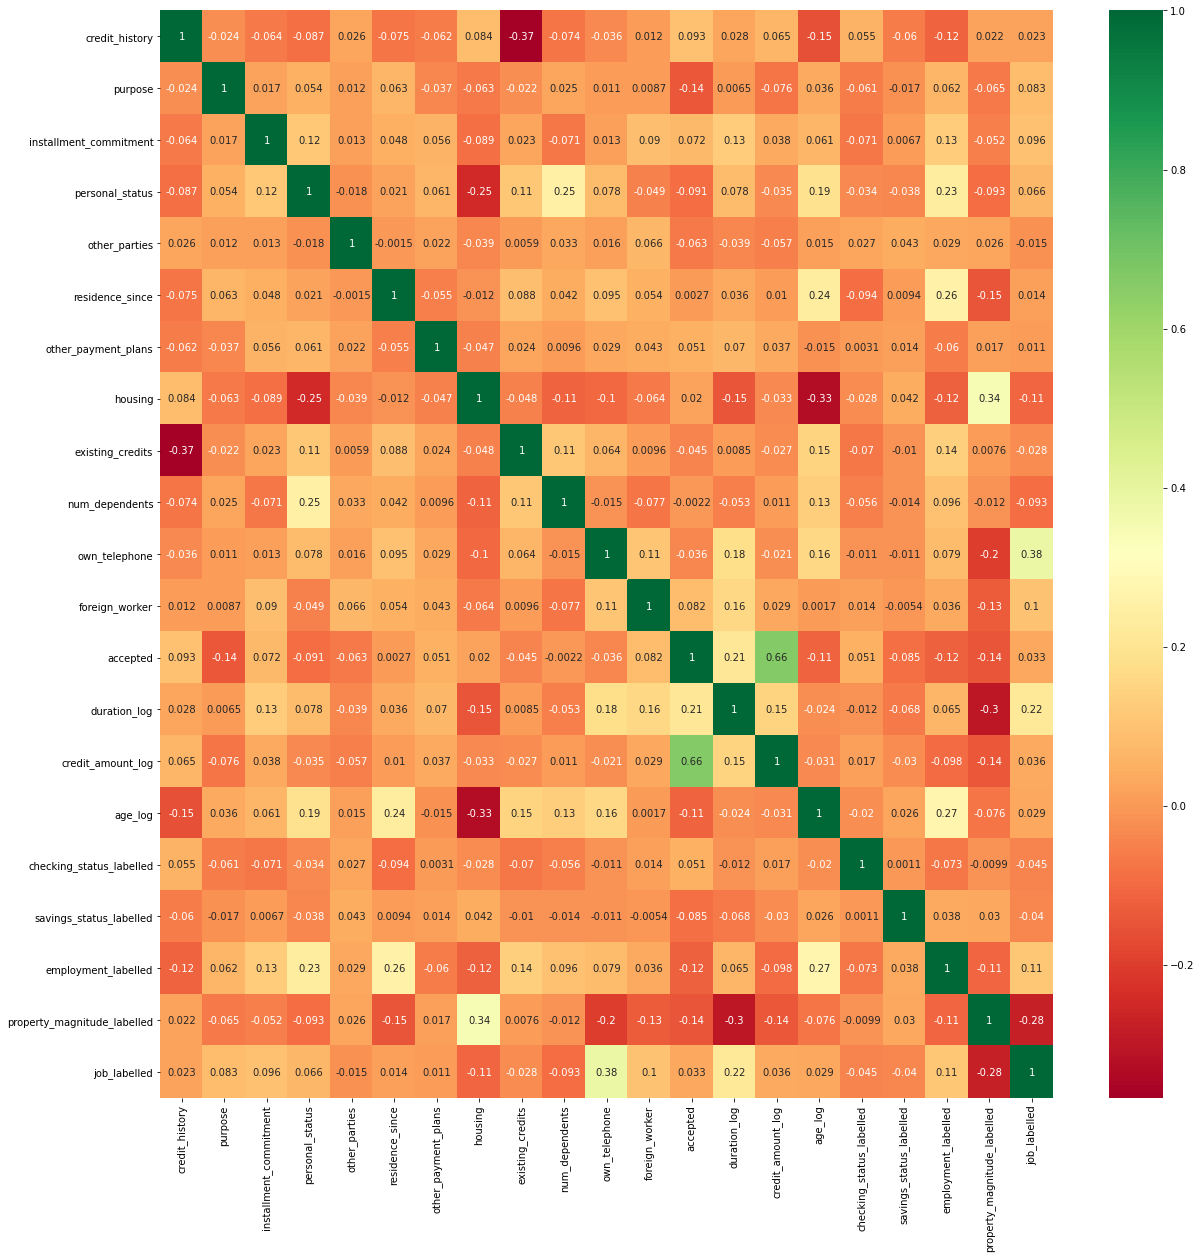

In [56]:
# Correlation analysis of Label encoded dataset
corrmat = work_le_dataset.corr()
top_corr_features = corrmat.index

plt.figure(figsize=(20,20))

g = sns.heatmap(work_le_dataset[top_corr_features].corr(), 
                annot=True,
                cmap='RdYlGn')

In [57]:
# Most correlated features to the target variable
cor_col = abs(corrmat).sort_values(['accepted'], ascending=False) ['accepted']
cor_col

accepted                       1.000000
credit_amount_log              0.662593
duration_log                   0.212204
property_magnitude_labelled    0.143033
purpose                        0.138401
employment_labelled            0.119856
age_log                        0.110962
credit_history                 0.092883
personal_status                0.091010
savings_status_labelled        0.085414
foreign_worker                 0.081639
installment_commitment         0.072252
other_parties                  0.063089
checking_status_labelled       0.051399
other_payment_plans            0.050922
existing_credits               0.045407
own_telephone                  0.036110
job_labelled                   0.033392
housing                        0.019564
residence_since                0.002688
num_dependents                 0.002174
Name: accepted, dtype: float64

<Figure size 2160x2160 with 0 Axes>

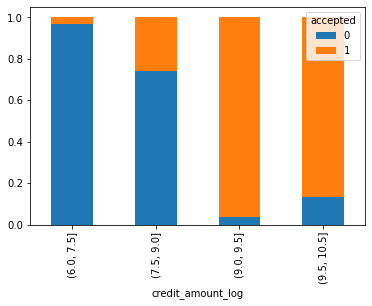

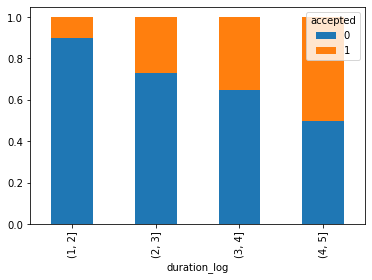

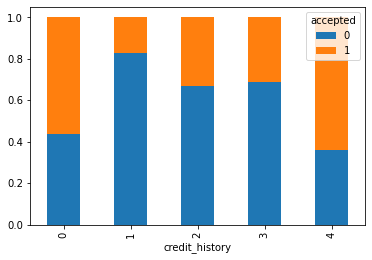

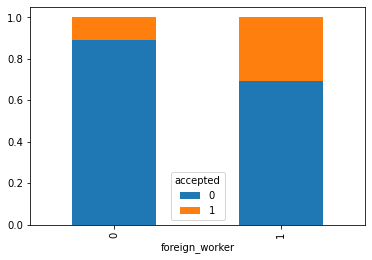

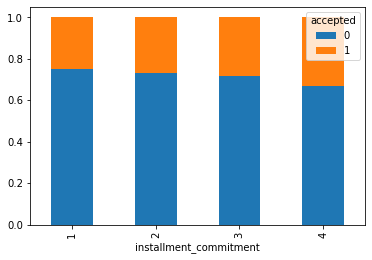

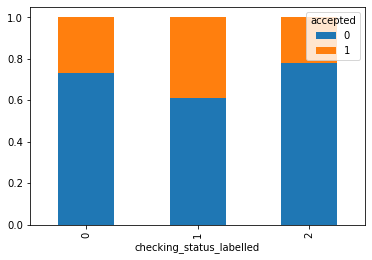

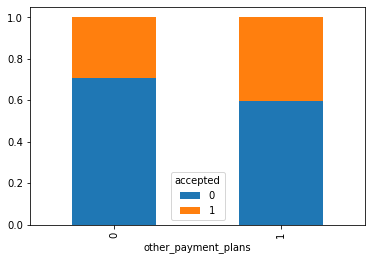

In [58]:
# Distribution of the target classes within the most correlated features
plt.figure(figsize=(30,30))
target_val =work_le_dataset['accepted'] 

col_name_ = pd.cut(work_le_dataset['credit_amount_log'], bins=[6, 7.5, 9, 9.5, 10.5])
ds = pd.crosstab(col_name_, target_val)
plot = ds.div(ds.sum(axis=1), axis=0).plot(kind="bar", stacked=True)
plt.show()

col_name_ = pd.cut(work_le_dataset['duration_log'], bins=[1, 2, 3, 4, 5])
ds = pd.crosstab(col_name_, target_val)
plot = ds.div(ds.sum(axis=1), axis=0).plot(kind="bar", stacked=True)
plt.show()

ds = pd.crosstab(work_le_dataset['credit_history'], target_val)
plot = ds.div(ds.sum(axis=1), axis=0).plot(kind="bar", stacked=True)
plt.show()

ds = pd.crosstab(work_le_dataset['foreign_worker'], target_val)
plot = ds.div(ds.sum(axis=1), axis=0).plot(kind="bar", stacked=True)
plt.show()

ds = pd.crosstab(work_le_dataset['installment_commitment'], target_val)
plot = ds.div(ds.sum(axis=1), axis=0).plot(kind="bar", stacked=True)
plt.show()

ds = pd.crosstab(work_le_dataset['checking_status_labelled'], target_val)
plot = ds.div(ds.sum(axis=1), axis=0).plot(kind="bar", stacked=True)
plt.show()

ds = pd.crosstab(work_le_dataset['other_payment_plans'], target_val)
plot = ds.div(ds.sum(axis=1), axis=0).plot(kind="bar", stacked=True)
plt.show()


### Comments:
Features with highest correlation (>0.1) to target value are:
   * credit_amount
   * duration_log

There is no significant correlation between the features themselves. All correlation coefficients between them are <0.4. Highly correlated features (>0.2):
   * existing_credits with credit_history
   * housing with age_log and personal_status
   * property_magnitude_labelled with duration_log and job_labelled

Significantly un-even distribution of the target classes exists in the following features: credit_amount, duration_log, credit_history and foreign_worker

# Modeling

Make train/test split : with train(70%), test(30%) with random_state = 0

Train the model
  
Evaluate the model
  
Achieve accuracy on test set >=0.90
  
For reproducibility please use random_state on train_test_split and model initialization




In [59]:
# Split the datasets

# Labele Encoded dataset
X_le = work_le_dataset.drop(columns='accepted', axis=1) 
y_le = work_le_dataset['accepted']
X_le_train, X_le_test, y_le_train, y_le_test = train_test_split(X_le, y_le, test_size=0.3, random_state=0)

# One-hot Encoded dataset
X_ohe = work_ohe_dataset.drop(columns='accepted', axis=1) 
y_ohe = work_ohe_dataset['accepted']
X_ohe_train, X_ohe_test, y_ohe_train, y_ohe_test = train_test_split(X_le, y_le, test_size=0.3, random_state=0)

# Target Encoded dataset
X_te = work_te_dataset.drop(columns='accepted', axis=1) 
y_te = work_te_dataset['accepted']
X_te_train, X_te_test, y_te_train, y_te_test = train_test_split(X_le, y_le, test_size=0.3, random_state=0)

# Count Encoded dataset
X_ce = work_ce_dataset.drop(columns='accepted', axis=1) 
y_ce = work_ce_dataset['accepted']
X_ce_train, X_ce_test, y_ce_train, y_ce_test = train_test_split(X_le, y_le, test_size=0.3, random_state=0)

# Split datasets list
X_list = [X_le, X_ohe, X_te, X_ce]
y_list = [y_le, y_ohe, y_te, y_ce]
X_train_list = [X_le_train, X_ohe_train, X_te_train, X_ce_train]
y_train_list = [y_le_train, y_ohe_train, y_te_train, y_ce_train]
X_test_list = [X_le_test, X_ohe_test, X_te_test, X_ce_test]
y_test_list = [y_le_test, y_ohe_test, y_te_test, y_ce_test]

#### Dummy classifier

In [60]:
def Dummy_model(X_train, y_train, X_test, y_test):
    dummy = DummyClassifier(strategy= "most_frequent", random_state = 0) 
    score_Dummy = []
    for i in range(0,len(X_train)):
        dummy = dummy.fit(X_train[i], y_train[i])
        score_dummy = dummy.score(X_train[i], y_train[i])
        score_Dummy.append(score_dummy)
        y_pred_Dummy = dummy.predict(X_test[i])
    Summary = pd.DataFrame()
    Summary['dataset'] = ['Label Encoded', 'One-hot Encoded', 'Target Encoded', 'Count Encoded']
    Summary['Dummy score'] = score_Dummy
    return Summary

In [61]:
Dummy_summary = Dummy_model(X_train_list, y_train_list, X_test_list, y_test_list)
Dummy_summary

,dataset,Dummy score
0,Label Encoded,0.710826
1,One-hot Encoded,0.710826
2,Target Encoded,0.710826
3,Count Encoded,0.710826


#### 1. Gaussian Naive Bayes classifier

In [62]:
def GaussianNB_model(X, y, X_train, y_train, X_test, y_test):
    gnb = GaussianNB() 
    accuracy_train = []
    accuracy_test = []
    precision_0 = []
    precision_1 = []
    recall_0 = []
    recall_1 = []
    f1_micro = []
    f1_weighted = []
    roc_auc = []
    kf_scores = []
    for i in range(0,len(X_train)):
        # Fit model
        GNB = gnb.fit(X_train[i], y_train[i])
        y_pred = GNB.predict(X_test[i])
        accuracy_test_ = metrics.accuracy_score(y_test[i], y_pred)
        accuracy_train_ = metrics.accuracy_score(y_train[i], GNB.predict(X_train[i]))
        #Performance Metrics and Evaluation
        precision_0_ = metrics.precision_score(y_test[i], y_pred, pos_label=0)
        recall_0_ = metrics.recall_score(y_test[i], y_pred, pos_label=0)
        precision_1_ = metrics.precision_score(y_test[i], y_pred, pos_label=1)
        recall_1_ = metrics.recall_score(y_test[i], y_pred, pos_label=1)
        f1_micro_ = metrics.f1_score(y_test[i], y_pred, average='micro')
        f1_weighted_ = metrics.f1_score(y_test[i], y_pred, average='weighted')
        #ROC curve
        fpr, tpr, threshold = metrics.roc_curve(y_test[i], y_pred) 
        roc_auc_ = metrics.auc(fpr, tpr)
        # Append all
        accuracy_train.append(accuracy_train_)
        accuracy_test.append(accuracy_test_)
        precision_0.append(precision_0_)
        precision_1.append(precision_1_)
        recall_0.append(recall_0_)
        recall_1.append(recall_1_)
        f1_micro.append(f1_micro_)
        f1_weighted.append(f1_weighted_)
        roc_auc.append(roc_auc_)
        # K-Fold 
        kf = KFold(n_splits=10, shuffle=True, random_state=0)  
        kf_scores_ = cross_val_score(GNB, X[i], y[i], cv=kf)
        kf_scores.append(kf_scores_.mean())
    Summary = pd.DataFrame()
    Summary['dataset'] = ['Label Encoded', 'One-hot Encoded', 'Target Encoded', 'Count Encoded']
    Summary['Accuracy on test'] = accuracy_test
    Summary['Accuracy on train'] = accuracy_train
    Summary['KFold score'] = kf_scores
    Summary['Precision 0'] = precision_0
    Summary['Precision 1'] = precision_1
    Summary['Recall 0'] = recall_0
    Summary['Recall 1'] = recall_1
    Summary['F1 micro'] = f1_micro
    Summary['F1 weighted'] = f1_weighted
    Summary['ROC'] = roc_auc
    return Summary

In [63]:
GaussianNB_summary = GaussianNB_model(X_list, y_list, X_train_list, y_train_list, X_test_list, y_test_list)
GaussianNB_summary

,dataset,Accuracy on test,Accuracy on train,KFold score,Precision 0,Precision 1,Recall 0,Recall 1,F1 micro,F1 weighted,ROC
0,Label Encoded,0.857143,0.891738,0.855515,0.930481,0.736842,0.852941,0.865979,0.857143,0.859792,0.85946
1,One-hot Encoded,0.857143,0.891738,0.760782,0.930481,0.736842,0.852941,0.865979,0.857143,0.859792,0.85946
2,Target Encoded,0.857143,0.891738,0.858495,0.930481,0.736842,0.852941,0.865979,0.857143,0.859792,0.85946
3,Count Encoded,0.857143,0.891738,0.844564,0.930481,0.736842,0.852941,0.865979,0.857143,0.859792,0.85946


#### 2. KNN classifier

Max KNN scores is 0.8073089700996677 for k_neighbors: 25



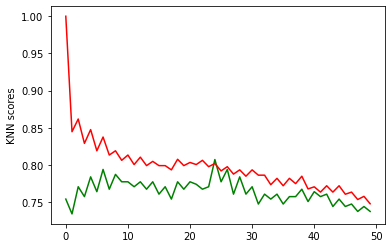

In [64]:
#Train the model for various depths - FOR loop
score_KNN_le = []
score_KNN_train_le = []
for k in range(1,51):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model = knn_model.fit(X_le_train, y_le_train)
    y_pred_KNN_le = knn_model.predict(X_le_test)
    #Evaluate the model (Accuracy)
    score_knn = metrics.accuracy_score(y_le_test, y_pred_KNN_le)
    score_KNN_le.append(score_knn)    
    #Check accuracy on train data (NOT VALID!)
    score_knn_train = metrics.accuracy_score(y_le_train, knn_model.predict(X_le_train))
    score_KNN_train_le.append(score_knn_train)
    KNN_dict = {k+1:v for k,v in enumerate(score_KNN_le)}
    opt_n_neighbors = max(KNN_dict, key=KNN_dict.get)
    
print(f"Max KNN scores is {max(score_KNN_le)} for k_neighbors: {opt_n_neighbors}")
print()

plt.plot(score_KNN_le, color="g", label='Acc. on test')
plt.plot(score_KNN_train_le, color="r", label='Acc. on train')
plt.ylabel('KNN scores');

In [65]:
def KNN_model(N_neighbors, X, y, X_train, y_train, X_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=N_neighbors) 
    accuracy_train = []
    accuracy_test = []
    precision_0 = []
    precision_1 = []
    recall_0 = []
    recall_1 = []
    f1_micro = []
    f1_weighted = []
    roc_auc = []
    kf_scores = []
    for i in range(0,len(X_train)):
        # Fit model
        KNN = knn.fit(X_train[i], y_train[i])
        y_pred = KNN.predict(X_test[i])
        accuracy_test_ = metrics.accuracy_score(y_test[i], y_pred)
        accuracy_train_ = metrics.accuracy_score(y_train[i], KNN.predict(X_train[i]))
        #Performance Metrics and Evaluation
        precision_0_ = metrics.precision_score(y_test[i], y_pred, pos_label=0)
        recall_0_ = metrics.recall_score(y_test[i], y_pred, pos_label=0)
        precision_1_ = metrics.precision_score(y_test[i], y_pred, pos_label=1)
        recall_1_ = metrics.recall_score(y_test[i], y_pred, pos_label=1)
        f1_micro_ = metrics.f1_score(y_test[i], y_pred, average='micro')
        f1_weighted_ = metrics.f1_score(y_test[i], y_pred, average='weighted')
        #ROC curve
        fpr, tpr, threshold = metrics.roc_curve(y_test[i], y_pred) 
        roc_auc_ = metrics.auc(fpr, tpr)
        # Append all
        accuracy_train.append(accuracy_train_)
        accuracy_test.append(accuracy_test_)
        precision_0.append(precision_0_)
        precision_1.append(precision_1_)
        recall_0.append(recall_0_)
        recall_1.append(recall_1_)
        f1_micro.append(f1_micro_)
        f1_weighted.append(f1_weighted_)
        roc_auc.append(roc_auc_)
        # K-Fold 
        kf = KFold(n_splits=10, shuffle=True, random_state=0)  
        kf_scores_ = cross_val_score(KNN, X[i], y[i], cv=kf)
        kf_scores.append(kf_scores_.mean())
    Summary = pd.DataFrame()
    Summary['dataset'] = ['Label Encoded', 'One-hot Encoded', 'Target Encoded', 'Count Encoded']
    Summary['Accuracy on test'] = accuracy_test
    Summary['Accuracy on train'] = accuracy_train
    Summary['KFold score'] = kf_scores
    Summary['Precision 0'] = precision_0
    Summary['Precision 1'] = precision_1
    Summary['Recall 0'] = recall_0
    Summary['Recall 1'] = recall_1
    Summary['F1 micro'] = f1_micro
    Summary['F1 weighted'] = f1_weighted
    Summary['ROC'] = roc_auc
    return Summary

In [66]:
N = opt_n_neighbors

KNN_summarry = KNN_model(N, X_list, y_list, X_train_list, y_train_list, X_test_list, y_test_list)
KNN_summarry

,dataset,Accuracy on test,Accuracy on train,KFold score,Precision 0,Precision 1,Recall 0,Recall 1,F1 micro,F1 weighted,ROC
0,Label Encoded,0.807309,0.801994,0.784634,0.787402,0.914894,0.980392,0.443299,0.807309,0.784374,0.711846
1,One-hot Encoded,0.807309,0.801994,0.809574,0.787402,0.914894,0.980392,0.443299,0.807309,0.784374,0.711846
2,Target Encoded,0.807309,0.801994,0.829505,0.787402,0.914894,0.980392,0.443299,0.807309,0.784374,0.711846
3,Count Encoded,0.807309,0.801994,0.708960,0.787402,0.914894,0.980392,0.443299,0.807309,0.784374,0.711846


#### 3. DecisionTree Classifier

Max Decision tree classifier scores is 0.9435215946843853 for tree depth = 1



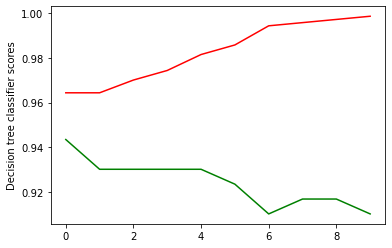

In [67]:
#Train the model for various depths - FOR loop
score_DT_le = []
score_DT_train_le = []
for dt in range(1,11):
    dt_model_le = tree.DecisionTreeClassifier(max_depth=dt, random_state=0)
    DT_model_le = dt_model_le.fit(X_le_train, y_le_train)
    y_pred_DT_le = DT_model_le.predict(X_le_test)
    #Evaluate the model (Accuracy)
    score_tree = accuracy_score(y_le_test, y_pred_DT_le)
    score_DT_le.append(score_tree)
    #Check accuracy on train data (NOT VALID!)
    score_tree_train_le = accuracy_score(y_le_train, DT_model_le.predict(X_le_train))
    score_DT_train_le.append(score_tree_train_le)
    DT_dict = {dt+1:v for dt,v in enumerate(score_DT_le)}
    opt_depth = max(DT_dict, key=DT_dict.get)
        
print(f"Max Decision tree classifier scores is {max(score_DT_le)} for tree depth = {opt_depth}")
print()

plt.plot(score_DT_le, color="g", label='Acc. on test')
plt.plot(score_DT_train_le, color="r", label='Acc. on train')
plt.ylabel('Decision tree classifier scores');

In [68]:
def DecisionTree_model(Depth, X, y, X_train, y_train, X_test, y_test):
    dt = DecisionTreeClassifier(max_depth=D, random_state=0) 
    accuracy_train = []
    accuracy_test = []
    precision_0 = []
    precision_1 = []
    recall_0 = []
    recall_1 = []
    f1_micro = []
    f1_weighted = []
    roc_auc = []
    kf_scores = []
    for i in range(0,len(X_train)):
        # Fit model
        DT = dt.fit(X_train[i], y_train[i])
        y_pred = DT.predict(X_test[i])
        accuracy_test_ = metrics.accuracy_score(y_test[i], y_pred)
        accuracy_train_ = metrics.accuracy_score(y_train[i], DT.predict(X_train[i]))
        #Performance Metrics and Evaluation
        precision_0_ = metrics.precision_score(y_test[i], y_pred, pos_label=0)
        recall_0_ = metrics.recall_score(y_test[i], y_pred, pos_label=0)
        precision_1_ = metrics.precision_score(y_test[i], y_pred, pos_label=1)
        recall_1_ = metrics.recall_score(y_test[i], y_pred, pos_label=1)
        f1_micro_ = metrics.f1_score(y_test[i], y_pred, average='micro')
        f1_weighted_ = metrics.f1_score(y_test[i], y_pred, average='weighted')
        #ROC curve
        fpr, tpr, threshold = metrics.roc_curve(y_test[i], y_pred) 
        roc_auc_ = metrics.auc(fpr, tpr)
        # Append all
        accuracy_train.append(accuracy_train_)
        accuracy_test.append(accuracy_test_)
        precision_0.append(precision_0_)
        precision_1.append(precision_1_)
        recall_0.append(recall_0_)
        recall_1.append(recall_1_)
        f1_micro.append(f1_micro_)
        f1_weighted.append(f1_weighted_)
        roc_auc.append(roc_auc_)
        # K-Fold 
        kf = KFold(n_splits=10, shuffle=True, random_state=0)  
        kf_scores_ = cross_val_score(DT, X[i], y[i], cv=kf)
        kf_scores.append(kf_scores_.mean())
    Summary = pd.DataFrame()
    Summary['dataset'] = ['Label Encoded', 'One-hot Encoded', 'Target Encoded', 'Count Encoded']
    Summary['Accuracy on test'] = accuracy_test
    Summary['Accuracy on train'] = accuracy_train
    Summary['KFold score'] = kf_scores
    Summary['Precision 0'] = precision_0
    Summary['Precision 1'] = precision_1
    Summary['Recall 0'] = recall_0
    Summary['Recall 1'] = recall_1
    Summary['F1 micro'] = f1_micro
    Summary['F1 weighted'] = f1_weighted
    Summary['ROC'] = roc_auc
    return Summary

In [69]:
D = 5 #opt_depth

DT_summarry = DecisionTree_model(D, X_list, y_list, X_train_list, y_train_list, X_test_list, y_test_list)
DT_summarry

,dataset,Accuracy on test,Accuracy on train,KFold score,Precision 0,Precision 1,Recall 0,Recall 1,F1 micro,F1 weighted,ROC
0,Label Encoded,0.930233,0.981481,0.949198,0.946341,0.895833,0.95098,0.886598,0.930233,0.930137,0.918789
1,One-hot Encoded,0.930233,0.981481,0.951208,0.946341,0.895833,0.95098,0.886598,0.930233,0.930137,0.918789
2,Target Encoded,0.930233,0.981481,0.950178,0.946341,0.895833,0.95098,0.886598,0.930233,0.930137,0.918789
3,Count Encoded,0.930233,0.981481,0.950218,0.946341,0.895833,0.95098,0.886598,0.930233,0.930137,0.918789


#### 4. SVC Classifier 

Max SVC scores is 0.9003322259136213 for C = 100, kernel = rbf and gamma = 0.001



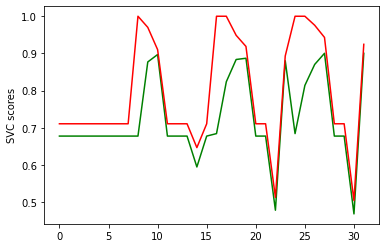

In [70]:
#Train the model for various depths - FOR loop
parameters = []
c_krn_g = [(0.1, 1, 10, 100), ('rbf', 'sigmoid'), (1, 0.1, 0.01, 0.001)]
for i in itertools.product(*c_krn_g):
         parameters.append(i)

score_SVC_le = []
score_SVC_train_le = []
for c in [0.1, 1, 10, 100]:
    for krn in ['rbf', 'sigmoid']:
        for g in [1, 0.1, 0.01, 0.001]:
            svc_model_le = SVC(C=c, kernel =krn, gamma=g, random_state=0)
            svc_model_le = svc_model_le.fit(X_le_train, y_le_train)
            y_pred_svc_le = svc_model_le.predict(X_le_test)
            #Evaluate the model (Accuracy)
            score_svc = accuracy_score(y_le_test, y_pred_svc_le)
            score_SVC_le.append(score_svc)
            #Check accuracy on train data 
            score_svc_train = accuracy_score(y_le_train, svc_model_le.predict(X_le_train))
            score_SVC_train_le.append(score_svc_train)
            SVC_dict = {c+1:v for c,v in enumerate(score_SVC_le)}
            opt_parameters = max(SVC_dict, key=SVC_dict.get)
            opt_C = parameters[opt_parameters-1][0]
            opt_kernel = parameters[opt_parameters-1][1]
            opt_gamma = parameters[opt_parameters-1][2]

print(f"Max SVC scores is {max(score_SVC_le)} for C = {opt_C}, kernel = {opt_kernel} and gamma = {opt_gamma}")
print()

plt.plot(score_SVC_le, color="g", label='Acc. on test')
plt.plot(score_SVC_train_le, color="r", label='Acc. on train')
plt.ylabel('SVC scores');

In [71]:
def SVC_model(c, Kernel, Gamma, X, y, X_train, y_train, X_test, y_test):
    svc = SVC(C=c, kernel =Kernel, gamma=Gamma, random_state=0) 
    accuracy_train = []
    accuracy_test = []
    precision_0 = []
    precision_1 = []
    recall_0 = []
    recall_1 = []
    f1_micro = []
    f1_weighted = []
    roc_auc = []
    kf_scores = []
    for i in range(0,len(X_train)):
        # Fit model
        SVC_model = svc.fit(X_train[i], y_train[i])
        y_pred = SVC_model.predict(X_test[i])
        accuracy_test_ = metrics.accuracy_score(y_test[i], y_pred)
        accuracy_train_ = metrics.accuracy_score(y_train[i], SVC_model.predict(X_train[i]))
        #Performance Metrics and Evaluation
        precision_0_ = metrics.precision_score(y_test[i], y_pred, pos_label=0)
        recall_0_ = metrics.recall_score(y_test[i], y_pred, pos_label=0)
        precision_1_ = metrics.precision_score(y_test[i], y_pred, pos_label=1)
        recall_1_ = metrics.recall_score(y_test[i], y_pred, pos_label=1)
        f1_micro_ = metrics.f1_score(y_test[i], y_pred, average='micro')
        f1_weighted_ = metrics.f1_score(y_test[i], y_pred, average='weighted')
        #ROC curve
        fpr, tpr, threshold = metrics.roc_curve(y_test[i], y_pred) 
        roc_auc_ = metrics.auc(fpr, tpr)
        # Append all
        accuracy_train.append(accuracy_train_)
        accuracy_test.append(accuracy_test_)
        precision_0.append(precision_0_)
        precision_1.append(precision_1_)
        recall_0.append(recall_0_)
        recall_1.append(recall_1_)
        f1_micro.append(f1_micro_)
        f1_weighted.append(f1_weighted_)
        roc_auc.append(roc_auc_)
        # K-Fold 
        kf = KFold(n_splits=10, shuffle=True, random_state=0)  
        kf_scores_ = cross_val_score(SVC_model, X[i], y[i], cv=kf)
        kf_scores.append(kf_scores_.mean())
    Summary = pd.DataFrame()
    Summary['dataset'] = ['Label Encoded', 'One-hot Encoded', 'Target Encoded', 'Count Encoded']
    Summary['Accuracy on test'] = accuracy_test
    Summary['Accuracy on train'] = accuracy_train
    Summary['KFold score'] = kf_scores
    Summary['Precision 0'] = precision_0
    Summary['Precision 1'] = precision_1
    Summary['Recall 0'] = recall_0
    Summary['Recall 1'] = recall_1
    Summary['F1 micro'] = f1_micro
    Summary['F1 weighted'] = f1_weighted
    Summary['ROC'] = roc_auc
    return Summary

In [72]:
C, Kernel, Gamma = opt_C, opt_kernel, opt_gamma

SVC_summarry = SVC_model(C, Kernel, Gamma, X_list, y_list, X_train_list, y_train_list, X_test_list, y_test_list)
SVC_summarry

,dataset,Accuracy on test,Accuracy on train,KFold score,Precision 0,Precision 1,Recall 0,Recall 1,F1 micro,F1 weighted,ROC
0,Label Encoded,0.900332,0.94302,0.919317,0.918269,0.860215,0.936275,0.824742,0.900332,0.899767,0.880508
1,One-hot Encoded,0.900332,0.94302,0.924297,0.918269,0.860215,0.936275,0.824742,0.900332,0.899767,0.880508
2,Target Encoded,0.900332,0.94302,0.935248,0.918269,0.860215,0.936275,0.824742,0.900332,0.899767,0.880508
3,Count Encoded,0.900332,0.94302,0.708901,0.918269,0.860215,0.936275,0.824742,0.900332,0.899767,0.880508


#### 5. RandomForest Classifier 

In [73]:
def RandomForest_model(N_estimators, X, y, X_train, y_train, X_test, y_test):
    rf = RandomForestClassifier(n_estimators=N_estimators, random_state=0)
    accuracy_train = []
    accuracy_test = []
    precision_0 = []
    precision_1 = []
    recall_0 = []
    recall_1 = []
    f1_micro = []
    f1_weighted = []
    roc_auc = []
    kf_scores = []
    for i in range(0,len(X_train)):
        # Fit model
        RF = rf.fit(X_train[i], y_train[i])
        y_pred = RF.predict(X_test[i])
        accuracy_test_ = metrics.accuracy_score(y_test[i], y_pred)
        accuracy_train_ = metrics.accuracy_score(y_train[i], RF.predict(X_train[i]))
        #Performance Metrics and Evaluation
        precision_0_ = metrics.precision_score(y_test[i], y_pred, pos_label=0)
        recall_0_ = metrics.recall_score(y_test[i], y_pred, pos_label=0)
        precision_1_ = metrics.precision_score(y_test[i], y_pred, pos_label=1)
        recall_1_ = metrics.recall_score(y_test[i], y_pred, pos_label=1)
        f1_micro_ = metrics.f1_score(y_test[i], y_pred, average='micro')
        f1_weighted_ = metrics.f1_score(y_test[i], y_pred, average='weighted')
        #ROC curve
        fpr, tpr, threshold = metrics.roc_curve(y_test[i], y_pred) 
        roc_auc_ = metrics.auc(fpr, tpr)
        # Append all
        accuracy_train.append(accuracy_train_)
        accuracy_test.append(accuracy_test_)
        precision_0.append(precision_0_)
        precision_1.append(precision_1_)
        recall_0.append(recall_0_)
        recall_1.append(recall_1_)
        f1_micro.append(f1_micro_)
        f1_weighted.append(f1_weighted_)
        roc_auc.append(roc_auc_)
        # K-Fold 
        kf = KFold(n_splits=10, shuffle=True, random_state=0)  
        kf_scores_ = cross_val_score(RF, X[i], y[i], cv=kf)
        kf_scores.append(kf_scores_.mean())
    Summary = pd.DataFrame()
    Summary['dataset'] = ['Label Encoded', 'One-hot Encoded', 'Target Encoded', 'Count Encoded']
    Summary['Accuracy on test'] = accuracy_test
    Summary['Accuracy on train'] = accuracy_train
    Summary['KFold score'] = kf_scores
    Summary['Precision 0'] = precision_0
    Summary['Precision 1'] = precision_1
    Summary['Recall 0'] = recall_0
    Summary['Recall 1'] = recall_1
    Summary['F1 micro'] = f1_micro
    Summary['F1 weighted'] = f1_weighted
    Summary['ROC'] = roc_auc
    return Summary

In [74]:
Nestimators = 100

RF_summarry = RandomForest_model(Nestimators, X_list, y_list, X_train_list, y_train_list, X_test_list, y_test_list)
RF_summarry

,dataset,Accuracy on test,Accuracy on train,KFold score,Precision 0,Precision 1,Recall 0,Recall 1,F1 micro,F1 weighted,ROC
0,Label Encoded,0.943522,1.0,0.957178,0.969849,0.892157,0.946078,0.938144,0.943522,0.943881,0.942111
1,One-hot Encoded,0.943522,1.0,0.954188,0.969849,0.892157,0.946078,0.938144,0.943522,0.943881,0.942111
2,Target Encoded,0.943522,1.0,0.956178,0.969849,0.892157,0.946078,0.938144,0.943522,0.943881,0.942111
3,Count Encoded,0.943522,1.0,0.955188,0.969849,0.892157,0.946078,0.938144,0.943522,0.943881,0.942111


#### 6. Bagging Classifier 

In [75]:
def BaggingClassifier_model(estimator, X, y, X_train, y_train, X_test, y_test):
    bag = BaggingClassifier(base_estimator=estimator, random_state=0)
    accuracy_train = []
    accuracy_test = []
    precision_0 = []
    precision_1 = []
    recall_0 = []
    recall_1 = []
    f1_micro = []
    f1_weighted = []
    roc_auc = []
    kf_scores = []
    for i in range(0,len(X_train)):
        # Fit model
        BAG = bag.fit(X_train[i], y_train[i])
        y_pred = BAG.predict(X_test[i])
        accuracy_test_ = metrics.accuracy_score(y_test[i], y_pred)
        accuracy_train_ = metrics.accuracy_score(y_train[i], BAG.predict(X_train[i]))
        #Performance Metrics and Evaluation
        precision_0_ = metrics.precision_score(y_test[i], y_pred, pos_label=0)
        recall_0_ = metrics.recall_score(y_test[i], y_pred, pos_label=0)
        precision_1_ = metrics.precision_score(y_test[i], y_pred, pos_label=1)
        recall_1_ = metrics.recall_score(y_test[i], y_pred, pos_label=1)
        f1_micro_ = metrics.f1_score(y_test[i], y_pred, average='micro')
        f1_weighted_ = metrics.f1_score(y_test[i], y_pred, average='weighted')
        #ROC curve
        fpr, tpr, threshold = metrics.roc_curve(y_test[i], y_pred) 
        roc_auc_ = metrics.auc(fpr, tpr)
        # Append all
        accuracy_train.append(accuracy_train_)
        accuracy_test.append(accuracy_test_)
        precision_0.append(precision_0_)
        precision_1.append(precision_1_)
        recall_0.append(recall_0_)
        recall_1.append(recall_1_)
        f1_micro.append(f1_micro_)
        f1_weighted.append(f1_weighted_)
        roc_auc.append(roc_auc_)
        # K-Fold 
        kf = KFold(n_splits=10, shuffle=True, random_state=0)  
        kf_scores_ = cross_val_score(BAG, X[i], y[i], cv=kf)
        kf_scores.append(kf_scores_.mean())
    Summary = pd.DataFrame()
    Summary['dataset'] = ['Label Encoded', 'One-hot Encoded', 'Target Encoded', 'Count Encoded']
    Summary['Accuracy on test'] = accuracy_test
    Summary['Accuracy on train'] = accuracy_train
    Summary['KFold score'] = kf_scores
    Summary['Precision 0'] = precision_0
    Summary['Precision 1'] = precision_1
    Summary['Recall 0'] = recall_0
    Summary['Recall 1'] = recall_1
    Summary['F1 micro'] = f1_micro
    Summary['F1 weighted'] = f1_weighted
    Summary['ROC'] = roc_auc
    return Summary

In [76]:
Estimator = DecisionTreeClassifier(random_state=0)

Bagging_summarry = BaggingClassifier_model(Estimator, X_list, y_list, X_train_list, y_train_list, X_test_list, y_test_list)
Bagging_summarry

,dataset,Accuracy on test,Accuracy on train,KFold score,Precision 0,Precision 1,Recall 0,Recall 1,F1 micro,F1 weighted,ROC
0,Label Encoded,0.936877,0.991453,0.949228,0.95122,0.90625,0.955882,0.896907,0.936877,0.936791,0.926395
1,One-hot Encoded,0.936877,0.991453,0.943238,0.95122,0.90625,0.955882,0.896907,0.936877,0.936791,0.926395
2,Target Encoded,0.936877,0.991453,0.947228,0.95122,0.90625,0.955882,0.896907,0.936877,0.936791,0.926395
3,Count Encoded,0.936877,0.991453,0.950208,0.95122,0.90625,0.955882,0.896907,0.936877,0.936791,0.926395


#### 7. AdaBoost Classifier 

In [77]:
def AdaBoostClassifier_model(estimator, X, y, X_train, y_train, X_test, y_test):
    abc = AdaBoostClassifier(base_estimator=estimator, random_state=0)
    accuracy_train = []
    accuracy_test = []
    precision_0 = []
    precision_1 = []
    recall_0 = []
    recall_1 = []
    f1_micro = []
    f1_weighted = []
    roc_auc = []
    kf_scores = []
    for i in range(0,len(X_train)):
        # Fit model
        ABC = abc.fit(X_train[i], y_train[i])
        y_pred = ABC.predict(X_test[i])
        accuracy_test_ = metrics.accuracy_score(y_test[i], y_pred)
        accuracy_train_ = metrics.accuracy_score(y_train[i], ABC.predict(X_train[i]))
        #Performance Metrics and Evaluation
        precision_0_ = metrics.precision_score(y_test[i], y_pred, pos_label=0)
        recall_0_ = metrics.recall_score(y_test[i], y_pred, pos_label=0)
        precision_1_ = metrics.precision_score(y_test[i], y_pred, pos_label=1)
        recall_1_ = metrics.recall_score(y_test[i], y_pred, pos_label=1)
        f1_micro_ = metrics.f1_score(y_test[i], y_pred, average='micro')
        f1_weighted_ = metrics.f1_score(y_test[i], y_pred, average='weighted')
        #ROC curve
        fpr, tpr, threshold = metrics.roc_curve(y_test[i], y_pred) 
        roc_auc_ = metrics.auc(fpr, tpr)
        # Append all
        accuracy_train.append(accuracy_train_)
        accuracy_test.append(accuracy_test_)
        precision_0.append(precision_0_)
        precision_1.append(precision_1_)
        recall_0.append(recall_0_)
        recall_1.append(recall_1_)
        f1_micro.append(f1_micro_)
        f1_weighted.append(f1_weighted_)
        roc_auc.append(roc_auc_)
        # K-Fold 
        kf = KFold(n_splits=10, shuffle=True, random_state=0)  
        kf_scores_ = cross_val_score(ABC, X[i], y[i], cv=kf)
        kf_scores.append(kf_scores_.mean())
    Summary = pd.DataFrame()
    Summary['dataset'] = ['Label Encoded', 'One-hot Encoded', 'Target Encoded', 'Count Encoded']
    Summary['Accuracy on test'] = accuracy_test
    Summary['Accuracy on train'] = accuracy_train
    Summary['KFold score'] = kf_scores
    Summary['Precision 0'] = precision_0
    Summary['Precision 1'] = precision_1
    Summary['Recall 0'] = recall_0
    Summary['Recall 1'] = recall_1
    Summary['F1 micro'] = f1_micro
    Summary['F1 weighted'] = f1_weighted
    Summary['ROC'] = roc_auc
    return Summary

In [78]:
Estimator = DecisionTreeClassifier(random_state=0)

AdaBoost_summarry = AdaBoostClassifier_model(Estimator, X_list, y_list, X_train_list, y_train_list, X_test_list, y_test_list)
AdaBoost_summarry

,dataset,Accuracy on test,Accuracy on train,KFold score,Precision 0,Precision 1,Recall 0,Recall 1,F1 micro,F1 weighted,ROC
0,Label Encoded,0.89701,1.0,0.920257,0.913876,0.858696,0.936275,0.814433,0.89701,0.896271,0.875354
1,One-hot Encoded,0.89701,1.0,0.921297,0.913876,0.858696,0.936275,0.814433,0.89701,0.896271,0.875354
2,Target Encoded,0.89701,1.0,0.919307,0.913876,0.858696,0.936275,0.814433,0.89701,0.896271,0.875354
3,Count Encoded,0.89701,1.0,0.923307,0.913876,0.858696,0.936275,0.814433,0.89701,0.896271,0.875354


#### 8. Voting Classifier 

In [79]:
def VotingClassifier_model(C1, C2, C3, Vote, X, y, X_train, y_train, X_test, y_test):
    voting = VotingClassifier(estimators=[(f'{C1}', C1), (f'{C2}', C2), (f'{C3}', C3)], voting=Vote)
    accuracy_train = []
    accuracy_test = []
    precision_0 = []
    precision_1 = []
    recall_0 = []
    recall_1 = []
    f1_micro = []
    f1_weighted = []
    roc_auc = []
    kf_scores = []
    for i in range(0,len(X_train)):
        # Fit model
        Voting = voting.fit(X_train[i], y_train[i])
        y_pred = Voting.predict(X_test[i])
        accuracy_test_ = metrics.accuracy_score(y_test[i], y_pred)
        accuracy_train_ = metrics.accuracy_score(y_train[i], Voting.predict(X_train[i]))
        #Performance Metrics and Evaluation
        precision_0_ = metrics.precision_score(y_test[i], y_pred, pos_label=0)
        recall_0_ = metrics.recall_score(y_test[i], y_pred, pos_label=0)
        precision_1_ = metrics.precision_score(y_test[i], y_pred, pos_label=1)
        recall_1_ = metrics.recall_score(y_test[i], y_pred, pos_label=1)
        f1_micro_ = metrics.f1_score(y_test[i], y_pred, average='micro')
        f1_weighted_ = metrics.f1_score(y_test[i], y_pred, average='weighted')
        #ROC curve
        fpr, tpr, threshold = metrics.roc_curve(y_test[i], y_pred) 
        roc_auc_ = metrics.auc(fpr, tpr)
        # Append all
        accuracy_train.append(accuracy_train_)
        accuracy_test.append(accuracy_test_)
        precision_0.append(precision_0_)
        precision_1.append(precision_1_)
        recall_0.append(recall_0_)
        recall_1.append(recall_1_)
        f1_micro.append(f1_micro_)
        f1_weighted.append(f1_weighted_)
        roc_auc.append(roc_auc_)
        # K-Fold 
        kf = KFold(n_splits=10, shuffle=True, random_state=0)  
        kf_scores_ = cross_val_score(Voting, X[i], y[i], cv=kf)
        kf_scores.append(kf_scores_.mean())
    Summary = pd.DataFrame()
    Summary['dataset'] = ['Label Encoded', 'One-hot Encoded', 'Target Encoded', 'Count Encoded']
    Summary['Accuracy on test'] = accuracy_test
    Summary['Accuracy on train'] = accuracy_train
    Summary['KFold score'] = kf_scores
    Summary['Precision 0'] = precision_0
    Summary['Precision 1'] = precision_1
    Summary['Recall 0'] = recall_0
    Summary['Recall 1'] = recall_1
    Summary['F1 micro'] = f1_micro
    Summary['F1 weighted'] = f1_weighted
    Summary['ROC'] = roc_auc
    return Summary

In [80]:
clf1 = DecisionTreeClassifier(random_state=0)
clf2 = SVC(degree=2, kernel='poly', random_state=0)
clf3 = GaussianNB() 
vote = ['hard']

Voting_summarry = VotingClassifier_model(clf1, clf2, clf3, vote[0], X_list, y_list, X_train_list, y_train_list, X_test_list, y_test_list)
Voting_summarry

,dataset,Accuracy on test,Accuracy on train,KFold score,Precision 0,Precision 1,Recall 0,Recall 1,F1 micro,F1 weighted,ROC
0,Label Encoded,0.913621,0.957265,0.932267,0.945,0.851485,0.926471,0.886598,0.913621,0.914066,0.906534
1,One-hot Encoded,0.913621,0.957265,0.919317,0.945,0.851485,0.926471,0.886598,0.913621,0.914066,0.906534
2,Target Encoded,0.913621,0.957265,0.924267,0.945,0.851485,0.926471,0.886598,0.913621,0.914066,0.906534
3,Count Encoded,0.913621,0.957265,0.913337,0.945,0.851485,0.926471,0.886598,0.913621,0.914066,0.906534


#### 9. StackingClassifier 

In [81]:
def StackingClassifier_model(C1, C2, C3, X, y, X_train, y_train, X_test, y_test):
    stacking = StackingClassifier(estimators=[(f'{C1}', C1), (f'{C2}', C2), (f'{C3}', C3)])
    accuracy_train = []
    accuracy_test = []
    precision_0 = []
    precision_1 = []
    recall_0 = []
    recall_1 = []
    f1_micro = []
    f1_weighted = []
    roc_auc = []
    kf_scores = []
    for i in range(0,len(X_train)):
        # Fit model
        Stacking = stacking.fit(X_train[i], y_train[i])
        y_pred = Stacking.predict(X_test[i])
        accuracy_test_ = metrics.accuracy_score(y_test[i], y_pred)
        accuracy_train_ = metrics.accuracy_score(y_train[i], Stacking.predict(X_train[i]))
        #Performance Metrics and Evaluation
        precision_0_ = metrics.precision_score(y_test[i], y_pred, pos_label=0)
        recall_0_ = metrics.recall_score(y_test[i], y_pred, pos_label=0)
        precision_1_ = metrics.precision_score(y_test[i], y_pred, pos_label=1)
        recall_1_ = metrics.recall_score(y_test[i], y_pred, pos_label=1)
        f1_micro_ = metrics.f1_score(y_test[i], y_pred, average='micro')
        f1_weighted_ = metrics.f1_score(y_test[i], y_pred, average='weighted')
        #ROC curve
        fpr, tpr, threshold = metrics.roc_curve(y_test[i], y_pred) 
        roc_auc_ = metrics.auc(fpr, tpr)
        # Append all
        accuracy_train.append(accuracy_train_)
        accuracy_test.append(accuracy_test_)
        precision_0.append(precision_0_)
        precision_1.append(precision_1_)
        recall_0.append(recall_0_)
        recall_1.append(recall_1_)
        f1_micro.append(f1_micro_)
        f1_weighted.append(f1_weighted_)
        roc_auc.append(roc_auc_)
        # K-Fold 
        kf = KFold(n_splits=10, shuffle=True, random_state=0)  
        kf_scores_ = cross_val_score(Stacking, X[i], y[i], cv=kf)
        kf_scores.append(kf_scores_.mean())
    Summary = pd.DataFrame()
    Summary['dataset'] = ['Label Encoded', 'One-hot Encoded', 'Target Encoded', 'Count Encoded']
    Summary['Accuracy on test'] = accuracy_test
    Summary['Accuracy on train'] = accuracy_train
    Summary['KFold score'] = kf_scores
    Summary['Precision 0'] = precision_0
    Summary['Precision 1'] = precision_1
    Summary['Recall 0'] = recall_0
    Summary['Recall 1'] = recall_1
    Summary['F1 micro'] = f1_micro
    Summary['F1 weighted'] = f1_weighted
    Summary['ROC'] = roc_auc
    return Summary

In [82]:
cl1 = DecisionTreeClassifier(random_state=0)
cl2 = SVC(degree=2, kernel='poly', random_state=0)
cl3 = GaussianNB()

Stacking_summarry = StackingClassifier_model(cl1, cl2, cl3, X_list, y_list, X_train_list, y_train_list, X_test_list, y_test_list)
Stacking_summarry

,dataset,Accuracy on test,Accuracy on train,KFold score,Precision 0,Precision 1,Recall 0,Recall 1,F1 micro,F1 weighted,ROC
0,Label Encoded,0.930233,0.981481,0.940198,0.942029,0.904255,0.955882,0.876289,0.930233,0.929939,0.916086
1,One-hot Encoded,0.930233,0.981481,0.938228,0.942029,0.904255,0.955882,0.876289,0.930233,0.929939,0.916086
2,Target Encoded,0.930233,0.981481,0.927287,0.942029,0.904255,0.955882,0.876289,0.930233,0.929939,0.916086
3,Count Encoded,0.930233,0.981481,0.923347,0.942029,0.904255,0.955882,0.876289,0.930233,0.929939,0.916086


# Summary 
    - Which model gives the best result?
    - What can we improve in the future?
    - Which encoding give better performance on this dataset (CatBoost or One-Hot)?
 
 - Precision/Recall evaluation

In [83]:
Dummy_summary['Dummy score'] [0]

0.7108262108262108

In [84]:
summary = pd.DataFrame()

summary['model / KFold score'] = ["Dummy", 
                                                    "GaussianNB",  
                                                    "KNN",  
                                                    "Decision tree", 
                                                    "SVC", 
                                                    "Random Forest", 
                                                    "BaggingClassifier (est: DT)", 
                                                    "AdaBoostClassifier (est: DT)", 
                                                    "Voting (DT, SVC, GNB)", 
                                                    "Stacking (DT, SVC, GNB)", 
                                                       ]

summary['Label Encoded'] = [Dummy_summary['Dummy score'] [0],  
                                          GaussianNB_summary['KFold score'] [0], 
                                          KNN_summarry['KFold score'] [0], 
                                          DT_summarry['KFold score'] [0], 
                                          SVC_summarry['KFold score'] [0], 
                                          RF_summarry['KFold score'] [0], 
                                          Bagging_summarry['KFold score'] [0], 
                                          AdaBoost_summarry['KFold score'] [0],  
                                          Voting_summarry['KFold score'] [0],  
                                          Stacking_summarry['KFold score'] [0], 
                                         ]

summary['One-hot Encoded'] = [Dummy_summary['Dummy score'] [1],  
                                              GaussianNB_summary['KFold score'] [1], 
                                              KNN_summarry['KFold score'] [1], 
                                              DT_summarry['KFold score'] [1], 
                                              SVC_summarry['KFold score'] [1], 
                                              RF_summarry['KFold score'] [1], 
                                              Bagging_summarry['KFold score'] [1], 
                                              AdaBoost_summarry['KFold score'] [1],  
                                              Voting_summarry['KFold score'] [1],  
                                              Stacking_summarry['KFold score'] [1], 
                                             ]

summary['Target Encoded'] = [Dummy_summary['Dummy score'] [2],  
                                              GaussianNB_summary['KFold score'] [2], 
                                              KNN_summarry['KFold score'] [2], 
                                              DT_summarry['KFold score'] [2], 
                                              SVC_summarry['KFold score'] [2], 
                                              RF_summarry['KFold score'] [2], 
                                              Bagging_summarry['KFold score'] [2], 
                                              AdaBoost_summarry['KFold score'] [2],  
                                              Voting_summarry['KFold score'] [2],  
                                              Stacking_summarry['KFold score'] [2], 
                                             ]

summary['Count Encoded'] = [Dummy_summary['Dummy score'] [3],  
                                          GaussianNB_summary['KFold score'] [3], 
                                          KNN_summarry['KFold score'] [3], 
                                          DT_summarry['KFold score'] [3], 
                                          SVC_summarry['KFold score'] [3], 
                                          RF_summarry['KFold score'] [3], 
                                          Bagging_summarry['KFold score'] [3], 
                                          AdaBoost_summarry['KFold score'] [3],  
                                          Voting_summarry['KFold score'] [3],  
                                          Stacking_summarry['KFold score'] [3], 
                                         ]


summary

,model / KFold score,Label Encoded,One-hot Encoded,Target Encoded,Count Encoded
0,Dummy,0.710826,0.710826,0.710826,0.710826
1,GaussianNB,0.855515,0.760782,0.858495,0.844564
2,KNN,0.784634,0.809574,0.829505,0.708960
3,Decision tree,0.949198,0.951208,0.950178,0.950218
4,SVC,0.919317,0.924297,0.935248,0.708901
5,Random Forest,0.957178,0.954188,0.956178,0.955188
6,BaggingClassifier (est: DT),0.949228,0.943238,0.947228,0.950208
7,AdaBoostClassifier (est: DT),0.920257,0.921297,0.919307,0.923307
8,"Voting (DT, SVC, GNB)",0.932267,0.919317,0.924267,0.913337
9,"Stacking (DT, SVC, GNB)",0.940198,0.938228,0.927287,0.923347


In [85]:
Sum = pd.DataFrame()

Sum['model'] = ["GaussianNB",  
                        "KNN",  
                        "Decision tree", 
                        "SVC", 
                        "Random Forest", 
                        "BaggingClassifier (est: DT)", 
                        "AdaBoostClassifier (est: DT)", 
                        "Voting (DT, SVC, GNB)", 
                        "Stacking (DT, SVC, GNB)", 
                           ]

Sum['Accuracy on test'] = [GaussianNB_summary['Accuracy on test'] [0], 
                                      KNN_summarry['Accuracy on test'] [0], 
                                      DT_summarry['Accuracy on test'] [0], 
                                      SVC_summarry['Accuracy on test'] [0], 
                                      RF_summarry['Accuracy on test'] [0], 
                                      Bagging_summarry['Accuracy on test'] [0], 
                                      AdaBoost_summarry['Accuracy on test'] [0],  
                                      Voting_summarry['Accuracy on test'] [0],  
                                      Stacking_summarry['Accuracy on test'] [0], 
                                     ]

Sum['Precision 0'] = [GaussianNB_summary['Precision 0'] [0], 
                              KNN_summarry['Precision 0'] [0], 
                              DT_summarry['Precision 0'] [0], 
                              SVC_summarry['Precision 0'] [0], 
                              RF_summarry['Precision 0'] [0], 
                              Bagging_summarry['Precision 0'] [0], 
                              AdaBoost_summarry['Precision 0'] [0],  
                              Voting_summarry['Precision 0'] [0],  
                              Stacking_summarry['Precision 0'] [0], 
                             ]

Sum['Precision 1'] = [GaussianNB_summary['Precision 1'] [0], 
                              KNN_summarry['Precision 1'] [0], 
                              DT_summarry['Precision 1'] [0], 
                              SVC_summarry['Precision 1'] [0], 
                              RF_summarry['Precision 1'] [0], 
                              Bagging_summarry['Precision 1'] [0], 
                              AdaBoost_summarry['Precision 1'] [0],  
                              Voting_summarry['Precision 1'] [0],  
                              Stacking_summarry['Precision 1'] [0], 
                             ]

Sum['Recall 0'] = [GaussianNB_summary['Recall 0'] [0], 
                              KNN_summarry['Recall 0'] [0], 
                              DT_summarry['Recall 0'] [0], 
                              SVC_summarry['Recall 0'] [0], 
                              RF_summarry['Recall 0'] [0], 
                              Bagging_summarry['Recall 0'] [0], 
                              AdaBoost_summarry['Recall 0'] [0],  
                              Voting_summarry['Recall 0'] [0],  
                              Stacking_summarry['Recall 0'] [0], 
                             ]

Sum['Recall 1'] = [GaussianNB_summary['Recall 1'] [0], 
                              KNN_summarry['Recall 1'] [0], 
                              DT_summarry['Recall 1'] [0], 
                              SVC_summarry['Recall 1'] [0], 
                              RF_summarry['Recall 1'] [0], 
                              Bagging_summarry['Recall 1'] [0], 
                              AdaBoost_summarry['Recall 1'] [0],  
                              Voting_summarry['Recall 1'] [0],  
                              Stacking_summarry['Recall 1'] [0], 
                             ]

Sum['F1 micro'] = [GaussianNB_summary['F1 micro'] [0], 
                              KNN_summarry['F1 micro'] [0], 
                              DT_summarry['F1 micro'] [0], 
                              SVC_summarry['F1 micro'] [0], 
                              RF_summarry['F1 micro'] [0], 
                              Bagging_summarry['F1 micro'] [0], 
                              AdaBoost_summarry['F1 micro'] [0],  
                              Voting_summarry['F1 micro'] [0],  
                              Stacking_summarry['F1 micro'] [0], 
                             ]

Sum['F1 weighted'] = [GaussianNB_summary['F1 weighted'] [0], 
                              KNN_summarry['F1 weighted'] [0], 
                              DT_summarry['F1 weighted'] [0], 
                              SVC_summarry['F1 weighted'] [0], 
                              RF_summarry['F1 weighted'] [0], 
                              Bagging_summarry['F1 weighted'] [0], 
                              AdaBoost_summarry['F1 weighted'] [0],  
                              Voting_summarry['F1 weighted'] [0],  
                              Stacking_summarry['F1 weighted'] [0], 
                             ]

Sum['ROC'] = [GaussianNB_summary['ROC'] [0], 
                      KNN_summarry['ROC'] [0], 
                      DT_summarry['ROC'] [0], 
                      SVC_summarry['ROC'] [0], 
                      RF_summarry['ROC'] [0], 
                      Bagging_summarry['ROC'] [0], 
                      AdaBoost_summarry['ROC'] [0],  
                      Voting_summarry['ROC'] [0],  
                      Stacking_summarry['ROC'] [0], 
                     ]

Sum

,model,Accuracy on test,Precision 0,Precision 1,Recall 0,Recall 1,F1 micro,F1 weighted,ROC
0,GaussianNB,0.857143,0.930481,0.736842,0.852941,0.865979,0.857143,0.859792,0.859460
1,KNN,0.807309,0.787402,0.914894,0.980392,0.443299,0.807309,0.784374,0.711846
2,Decision tree,0.930233,0.946341,0.895833,0.950980,0.886598,0.930233,0.930137,0.918789
3,SVC,0.900332,0.918269,0.860215,0.936275,0.824742,0.900332,0.899767,0.880508
4,Random Forest,0.943522,0.969849,0.892157,0.946078,0.938144,0.943522,0.943881,0.942111
5,BaggingClassifier (est: DT),0.936877,0.951220,0.906250,0.955882,0.896907,0.936877,0.936791,0.926395
6,AdaBoostClassifier (est: DT),0.897010,0.913876,0.858696,0.936275,0.814433,0.897010,0.896271,0.875354
7,"Voting (DT, SVC, GNB)",0.913621,0.945000,0.851485,0.926471,0.886598,0.913621,0.914066,0.906534
8,"Stacking (DT, SVC, GNB)",0.930233,0.942029,0.904255,0.955882,0.876289,0.930233,0.929939,0.916086


### Comments:

- All tested models, except for GaussianNB ans KNN give >0.9 accuracy score on KFold dataset.
- The efficacy of the encoding method depends on the model used to fit the data. Overall, there is higher prediction accuracy when the dataset is Label or Target Encoded. One-hot encoded dataset has the lowest prediction accuraccy - except for Decision tree model where it has the higherst performance.


- The target variable is best predicted with Random Forest model - accuraccy >0.95 no metter the encoding method used. All other metrics, such as Precision, Recall, F1-score and ROC are also the highest >0.9 for this mode. It has slightly higher predictive capaiility for the clients that should not be accepted for lian - class 0, which can be due to the target value distribution. 
